In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('CLEAN- PCOS SURVEY SPREADSHEET.csv')

In [4]:
df.columns

Index(['Age (in Years)', 'Weight (in Kg)', 'Height (in Cm / Feet)',
       'Can you tell us your blood group ?',
       'After how many months do you get your periods?\n(select 1- if every month/regular)',
       'Have you gained weight recently?',
       'Do you have excessive body/facial hair growth ?',
       'Are you noticing skin darkening recently?',
       'Do have hair loss/hair thinning/baldness ?',
       'Do you have pimples/acne on your face/jawline ?',
       'Do you eat fast food regularly ?',
       'Do you exercise on a regular basis ?',
       'Have you been diagnosed with PCOS/PCOD?',
       'Do you experience mood swings ?', 'Are your periods regular ?',
       'How long does your period last ? (in Days)\nexample- 1,2,3,4.....'],
      dtype='object')

In [5]:
df = df.rename(columns={
    "Age (in Years)": "Age",  
    "Weight (in Kg)": "Weight",  
    "Height (in Cm / Feet)": "Height",  
    "Can you tell us your blood group ?": "Blood Group",  
    "After how many months do you get your periods?\n(select 1- if every month/regular)": "Menstrual Cycle Interval",  
    "Have you gained weight recently?": "Recent Weight Gain",  
    "Are you noticing skin darkening recently?": "Skin Darkening",  
    "Do have hair loss/hair thinning/baldness ?": "Hair Loss",  
    "Do you have pimples/acne on your face/jawline ?": "Acne",  
    "Do you eat fast food regularly ?": "Regular Fast Food Consumption",  
    "Do you exercise on a regular basis ?": "Regular Exercise",  
    "Have you been diagnosed with PCOS/PCOD?": "PCOS Diagnosis",  
    "Do you experience mood swings ?": "Mood Swings",  
    "Are your periods regular ?": "Regular Periods",  
    "Do you have excessive body/facial hair growth ?": "Excessive Body/Facial Hair",  
    "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Menstrual Duration (Days)"  
})


In [6]:
df.columns

Index(['Age', 'Weight', 'Height', 'Blood Group', 'Menstrual Cycle Interval',
       'Recent Weight Gain', 'Excessive Body/Facial Hair', 'Skin Darkening',
       'Hair Loss', 'Acne', 'Regular Fast Food Consumption',
       'Regular Exercise', 'PCOS Diagnosis', 'Mood Swings', 'Regular Periods',
       'Menstrual Duration (Days)'],
      dtype='object')

In [7]:
df.dtypes

Age                                int64
Weight                           float64
Height                           float64
Blood Group                        int64
Menstrual Cycle Interval           int64
Recent Weight Gain                 int64
Excessive Body/Facial Hair         int64
Skin Darkening                     int64
Hair Loss                          int64
Acne                               int64
Regular Fast Food Consumption      int64
Regular Exercise                   int64
PCOS Diagnosis                     int64
Mood Swings                        int64
Regular Periods                    int64
Menstrual Duration (Days)          int64
dtype: object

In [8]:
dis_col=[]
cont_col=[]
for col in df.columns:
    if df[col].dtypes in ['int64','float64']:
        if df[col].nunique() > 15:
            cont_col.append(col)
        else:
            dis_col.append(col)
        

In [9]:
print("Discrete Columns: ",dis_col)
print("Continuous Columns: ",cont_col)

Discrete Columns:  ['Blood Group', 'Menstrual Cycle Interval', 'Recent Weight Gain', 'Excessive Body/Facial Hair', 'Skin Darkening', 'Hair Loss', 'Acne', 'Regular Fast Food Consumption', 'Regular Exercise', 'PCOS Diagnosis', 'Mood Swings', 'Regular Periods', 'Menstrual Duration (Days)']
Continuous Columns:  ['Age', 'Weight', 'Height']


In [10]:
dis_features_col=dis_col
dis_features_col.remove('PCOS Diagnosis')

In [11]:
for col in dis_features_col:
    df[col]=df[col].astype('category')

In [12]:
df.isnull().sum()

Age                              0
Weight                           0
Height                           0
Blood Group                      0
Menstrual Cycle Interval         0
Recent Weight Gain               0
Excessive Body/Facial Hair       0
Skin Darkening                   0
Hair Loss                        0
Acne                             0
Regular Fast Food Consumption    0
Regular Exercise                 0
PCOS Diagnosis                   0
Mood Swings                      0
Regular Periods                  0
Menstrual Duration (Days)        0
dtype: int64

In [13]:
df.nunique()

Age                              41
Weight                           62
Height                           42
Blood Group                       6
Menstrual Cycle Interval          3
Recent Weight Gain                2
Excessive Body/Facial Hair        2
Skin Darkening                    2
Hair Loss                         2
Acne                              2
Regular Fast Food Consumption     2
Regular Exercise                  2
PCOS Diagnosis                    2
Mood Swings                       2
Regular Periods                   2
Menstrual Duration (Days)        12
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(464, 16)

In [18]:
print('discrete features:',dis_features_col)
print('continuous features:',cont_col)
print('target feature:', 'PCOS Diagnosis')

discrete features: ['Blood Group', 'Menstrual Cycle Interval', 'Recent Weight Gain', 'Excessive Body/Facial Hair', 'Skin Darkening', 'Hair Loss', 'Acne', 'Regular Fast Food Consumption', 'Regular Exercise', 'Mood Swings', 'Regular Periods', 'Menstrual Duration (Days)']
continuous features: ['Age', 'Weight', 'Height']
target feature: PCOS Diagnosis


Blood Group
13    189
15    143
11    100
14     16
16      9
12      7
Name: count, dtype: int64


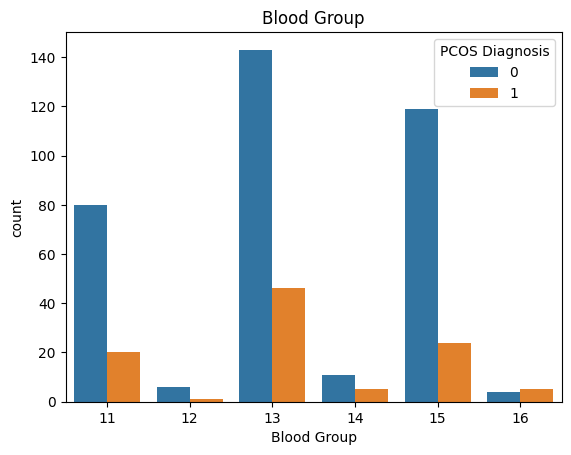

Menstrual Cycle Interval
1    389
2     47
3     28
Name: count, dtype: int64


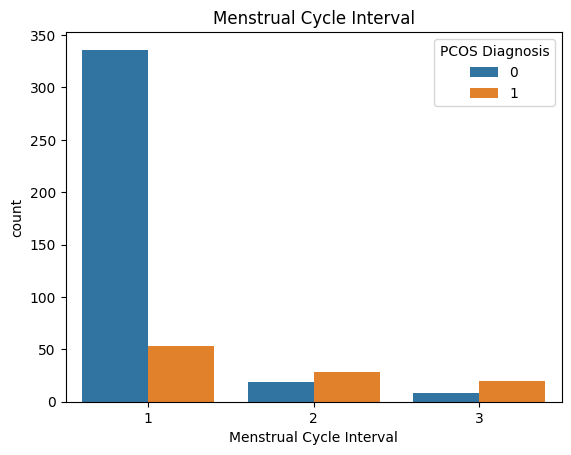

Recent Weight Gain
0    232
1    232
Name: count, dtype: int64


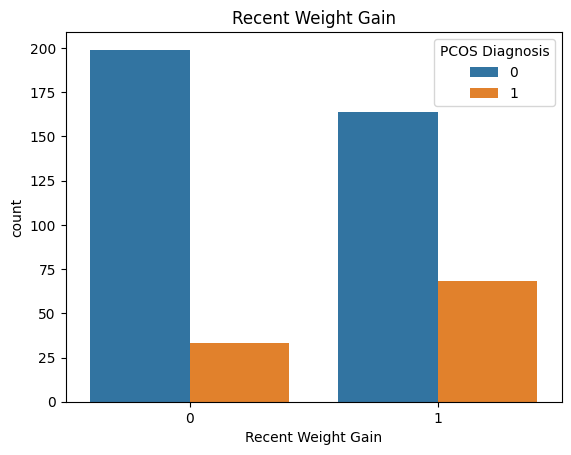

Excessive Body/Facial Hair
0    341
1    123
Name: count, dtype: int64


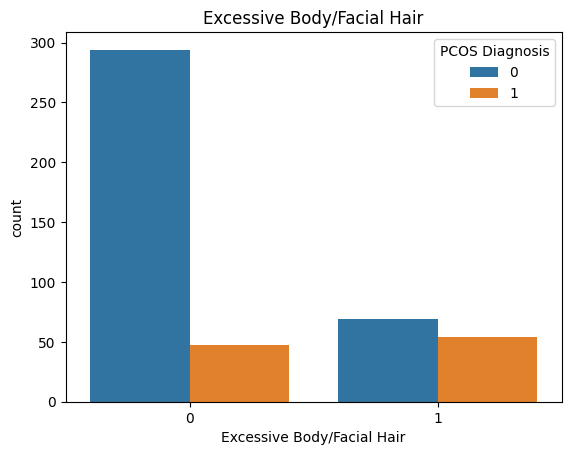

Skin Darkening
0    308
1    156
Name: count, dtype: int64


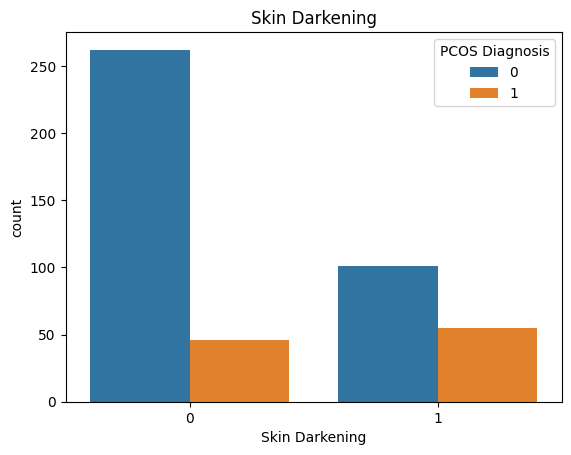

Hair Loss
1    287
0    177
Name: count, dtype: int64


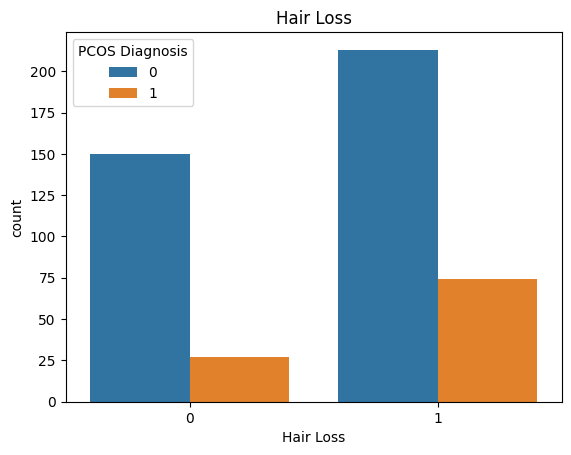

Acne
0    273
1    191
Name: count, dtype: int64


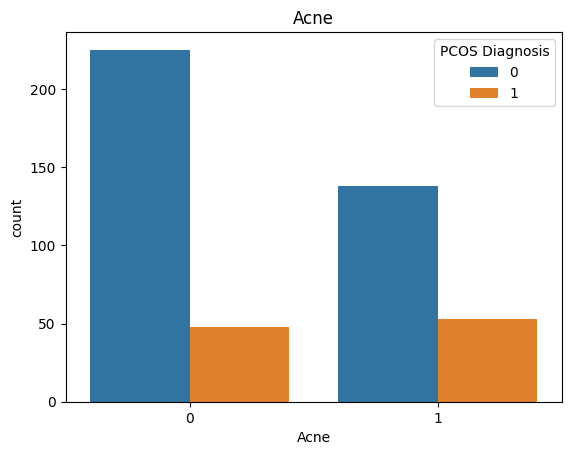

Regular Fast Food Consumption
0    298
1    166
Name: count, dtype: int64


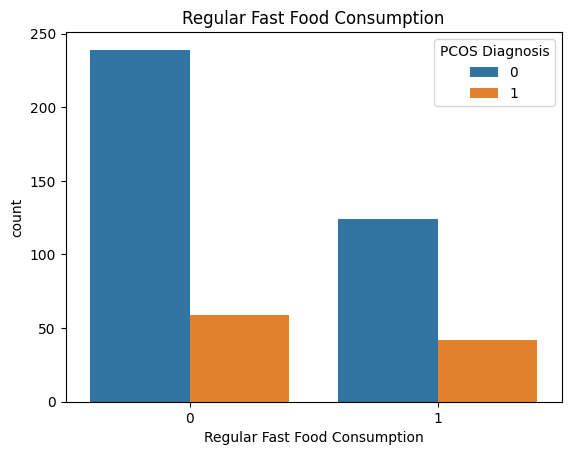

Regular Exercise
0    332
1    132
Name: count, dtype: int64


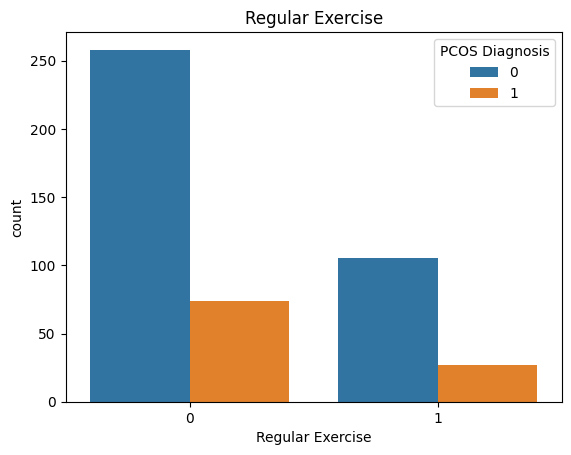

Mood Swings
1    353
0    111
Name: count, dtype: int64


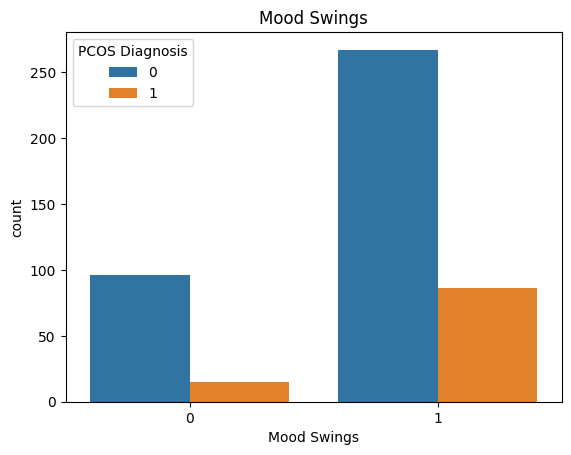

Regular Periods
1    365
0     99
Name: count, dtype: int64


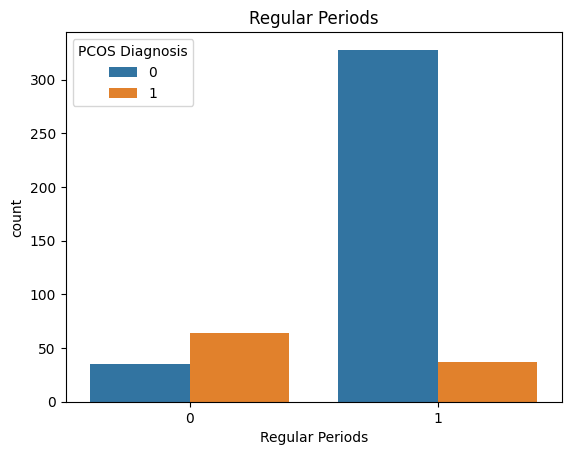

Menstrual Duration (Days)
5     144
4     141
3      62
6      58
7      22
2      16
8       7
1       6
10      4
0       2
14      1
15      1
Name: count, dtype: int64


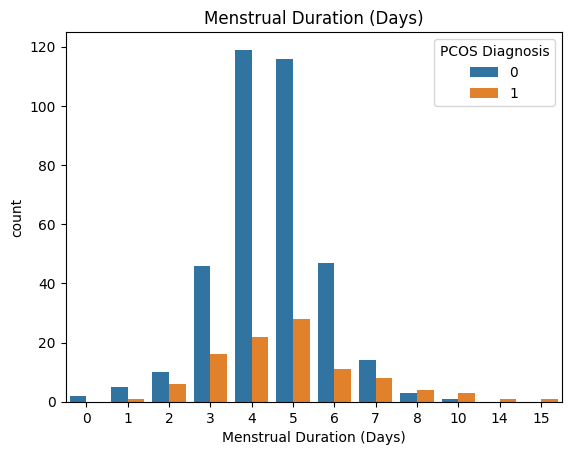

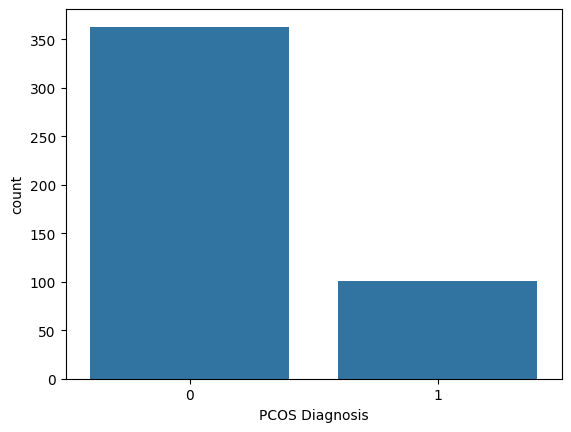

In [19]:
for col in dis_features_col:
    print(df[col].value_counts())
    sns.countplot(x=col,data=df,hue='PCOS Diagnosis')
    plt.title(col)
    plt.show()


sns.countplot(x='PCOS Diagnosis',data=df)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


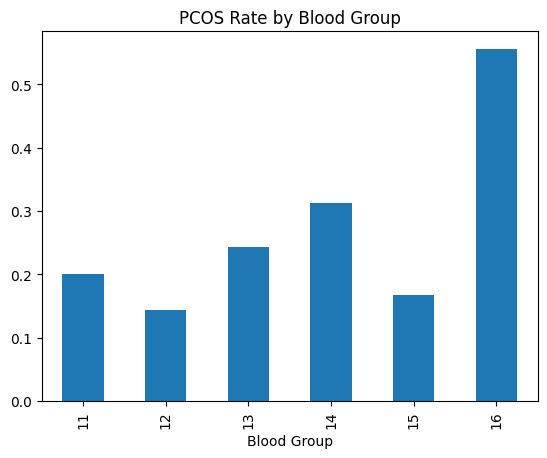

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


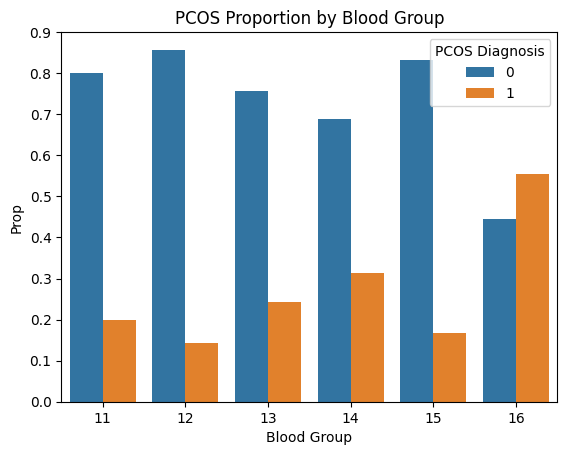

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


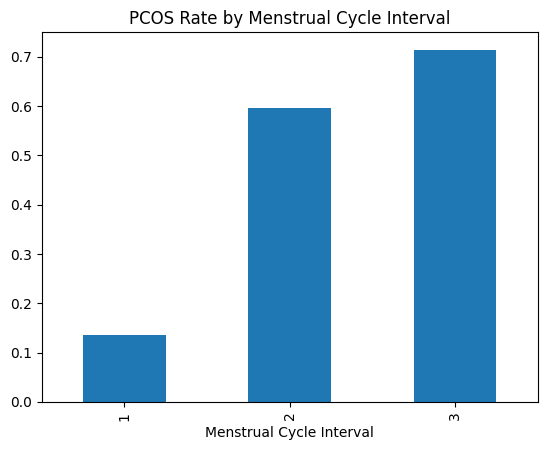

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


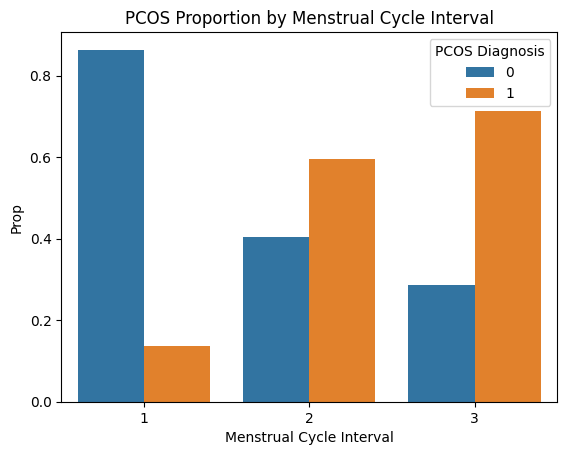

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


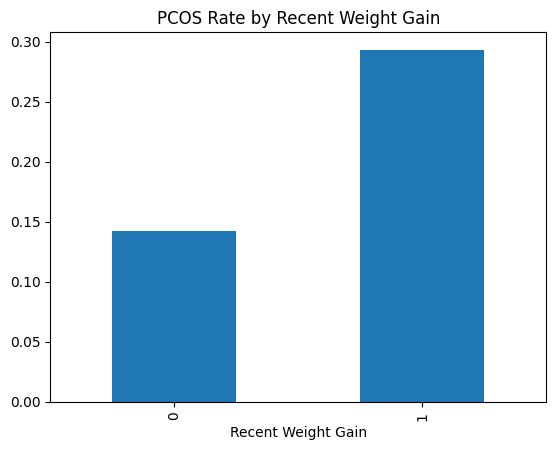

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


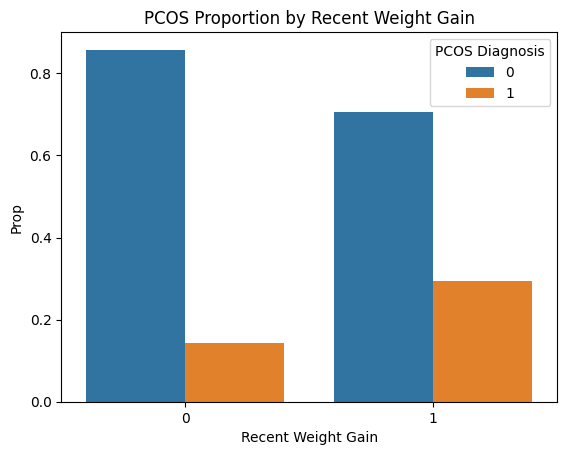

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


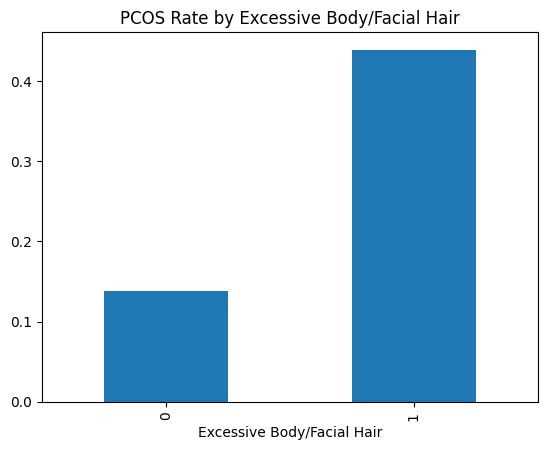

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


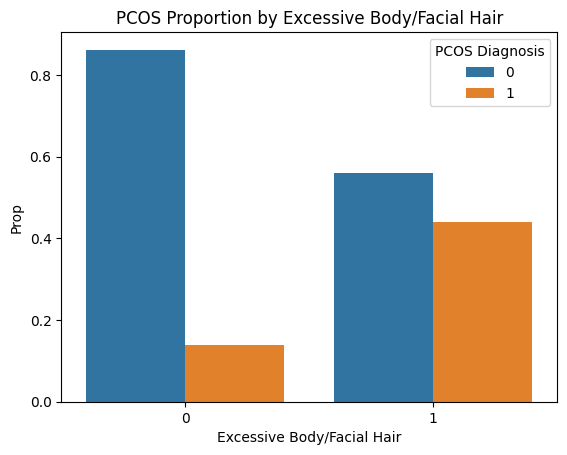

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


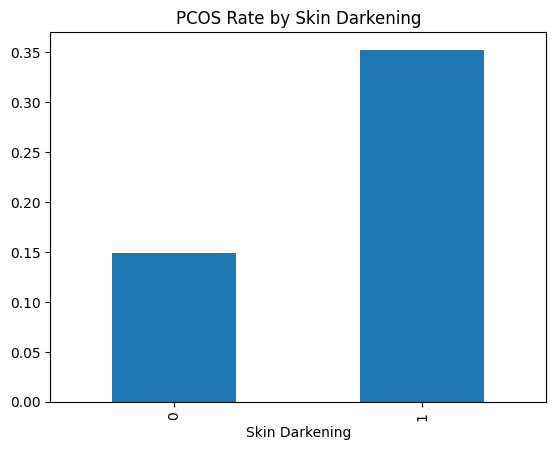

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


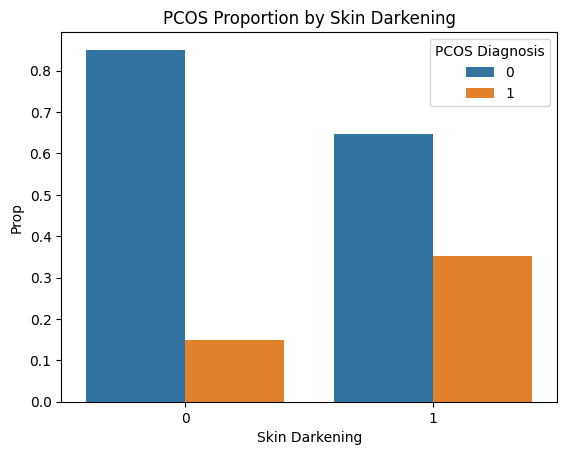

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


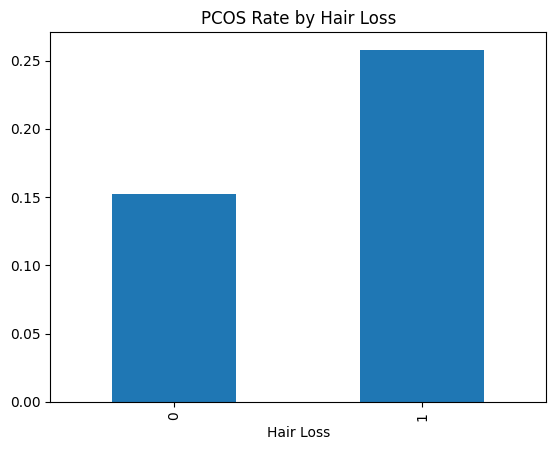

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


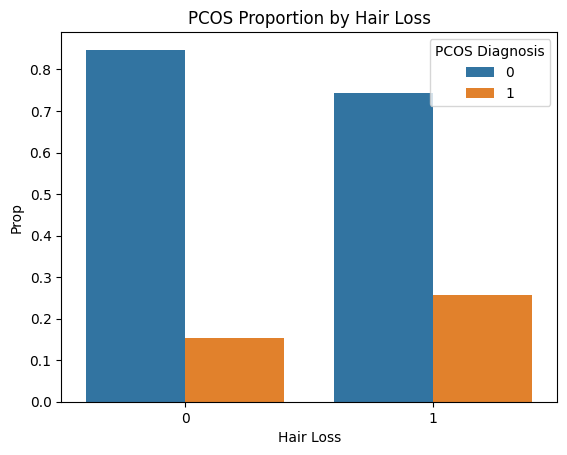

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


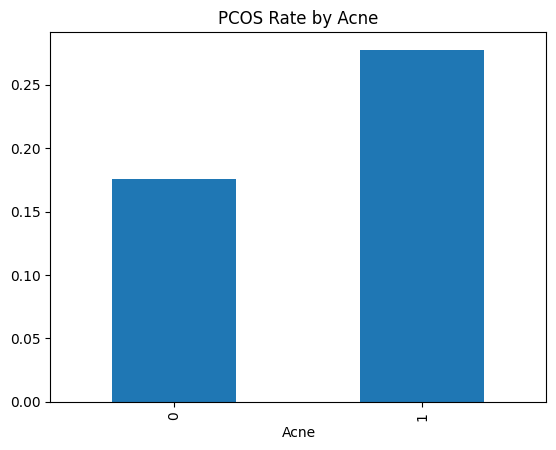

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


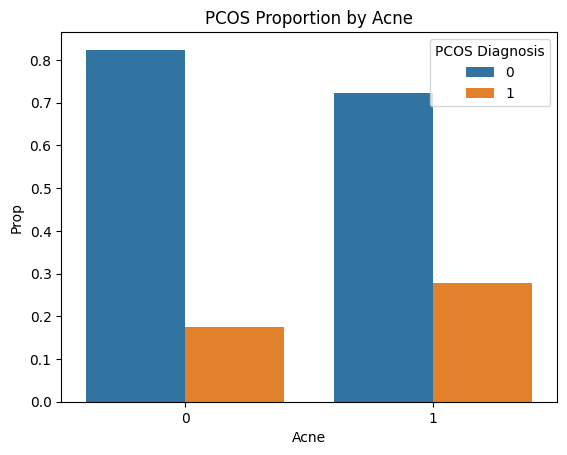

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


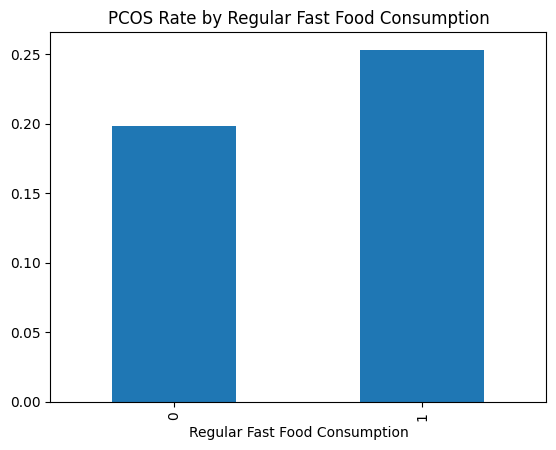

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


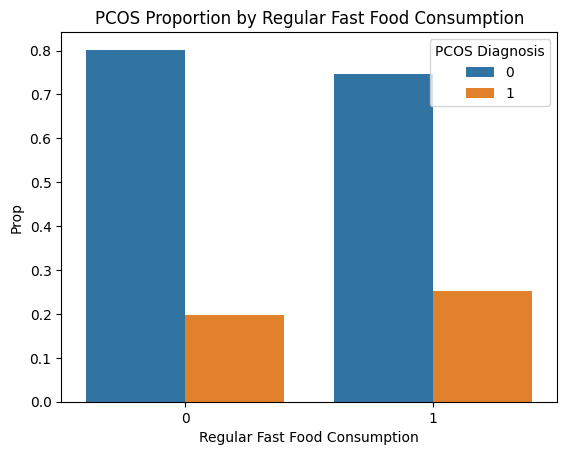

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


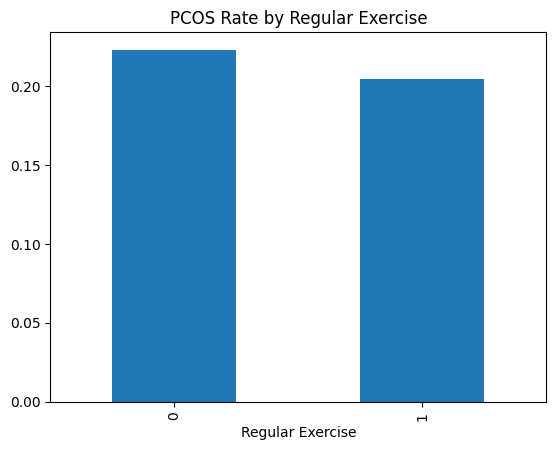

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


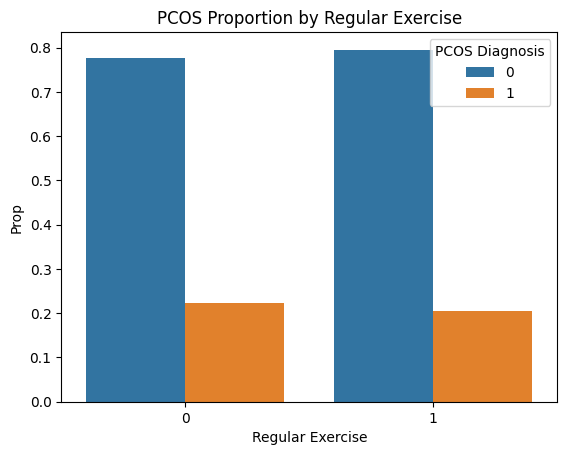

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


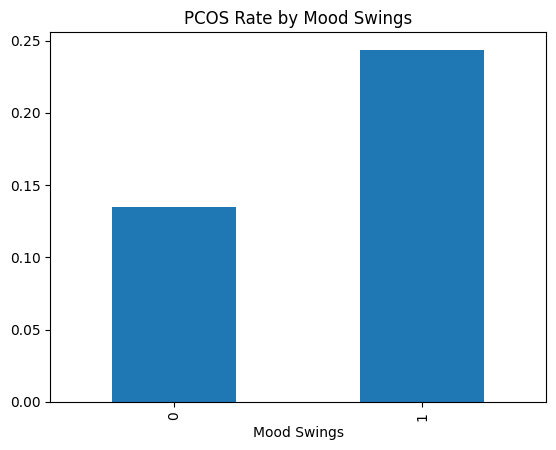

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


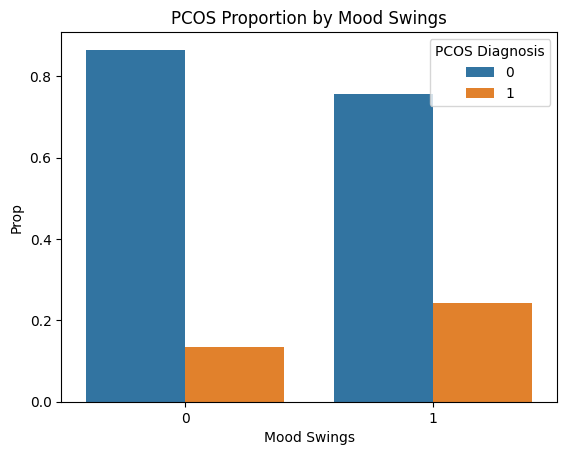

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


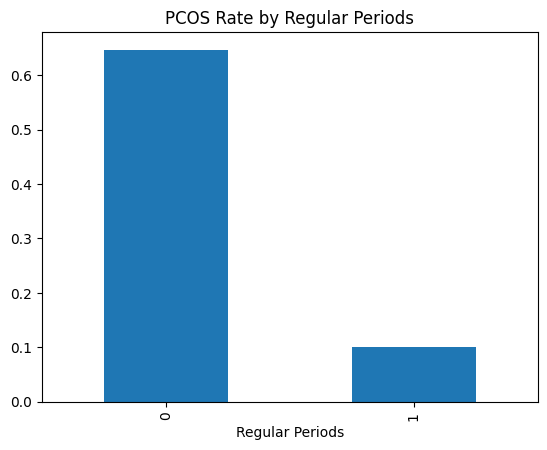

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


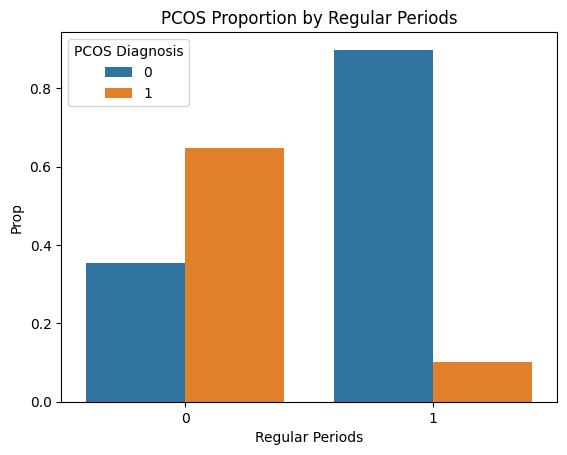

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()


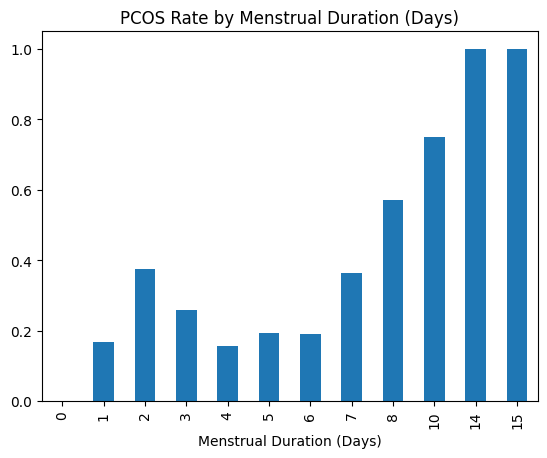

C:\Users\sneha\AppData\Local\Temp\ipykernel_3540\1733489527.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()


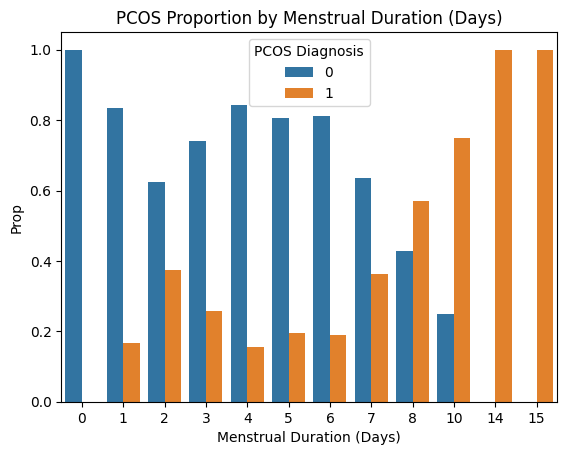

In [20]:
for col in dis_features_col:
    pcos_rate=df[df['PCOS Diagnosis']==1][col].groupby(df[col]).size()/df.groupby(df[col]).size()
    pcos_rate.plot(kind='bar')
    plt.title(f'PCOS Rate by {col}')
    plt.show()


    prop_df=df.groupby(col)['PCOS Diagnosis'].value_counts(normalize=True).rename('Prop').reset_index()

    sns.barplot(x=col,y='Prop',hue='PCOS Diagnosis',data=prop_df)
    plt.title(f'PCOS Proportion by {col}')
    plt.show()

In [21]:
#chi-squaretest

import scipy.stats as stats
from scipy.stats import chi2_contingency

associated_features={}
for col in dis_features_col:
    contigency=pd.crosstab(df[col],df['PCOS Diagnosis'])
    chi2,p,dof,expected=chi2_contingency(contigency)
    print(f"{col}- p-value:{p}")

    if p<0.05:
        print(f"{col} is associated with PCOS")
        associated_features[col]=p

    else:
        print(f"{col} is not associated with PCOS")



Blood Group- p-value:0.07212704221205571
Blood Group is not associated with PCOS
Menstrual Cycle Interval- p-value:2.1829286831197158e-21
Menstrual Cycle Interval is associated with PCOS
Recent Weight Gain- p-value:0.00013080730124454562
Recent Weight Gain is associated with PCOS
Excessive Body/Facial Hair- p-value:9.627930792321787e-12
Excessive Body/Facial Hair is associated with PCOS
Skin Darkening- p-value:9.97883421835998e-07
Skin Darkening is associated with PCOS
Hair Loss- p-value:0.01064717943796948
Hair Loss is associated with PCOS
Acne- p-value:0.012514596231269881
Acne is associated with PCOS
Regular Fast Food Consumption- p-value:0.20786655040408183
Regular Fast Food Consumption is not associated with PCOS
Regular Exercise- p-value:0.7585490828442296
Regular Exercise is not associated with PCOS
Mood Swings- p-value:0.022365950890529045
Mood Swings is associated with PCOS
Regular Periods- p-value:1.0516343326281025e-30
Regular Periods is associated with PCOS
Menstrual Durati

##Features which are correlated with PCOS through chi-square test



In [22]:
for index,value in associated_features.items():
    print(f"{index} is associated with PCOS with p-value {value}")

Menstrual Cycle Interval is associated with PCOS with p-value 2.1829286831197158e-21
Recent Weight Gain is associated with PCOS with p-value 0.00013080730124454562
Excessive Body/Facial Hair is associated with PCOS with p-value 9.627930792321787e-12
Skin Darkening is associated with PCOS with p-value 9.97883421835998e-07
Hair Loss is associated with PCOS with p-value 0.01064717943796948
Acne is associated with PCOS with p-value 0.012514596231269881
Mood Swings is associated with PCOS with p-value 0.022365950890529045
Regular Periods is associated with PCOS with p-value 1.0516343326281025e-30
Menstrual Duration (Days) is associated with PCOS with p-value 0.0021294570494972275


count    464.000000
mean      25.465517
std        8.105867
min       13.000000
25%       20.000000
50%       22.500000
75%       28.000000
max       58.000000
Name: Age, dtype: float64
Median of Age is 22.5
Skewness of Age is 1.4158149903023156
Kurtosis of Age is 1.3943722120245243


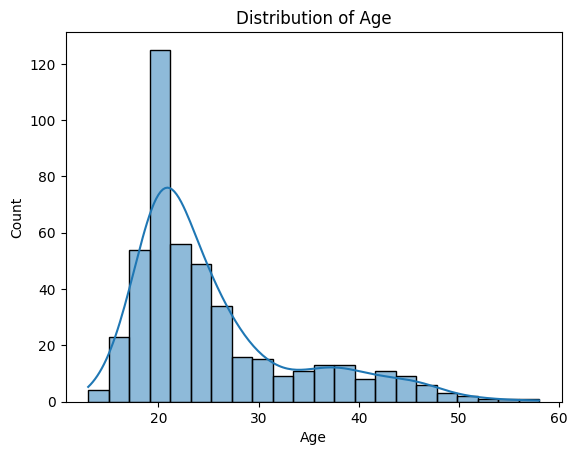

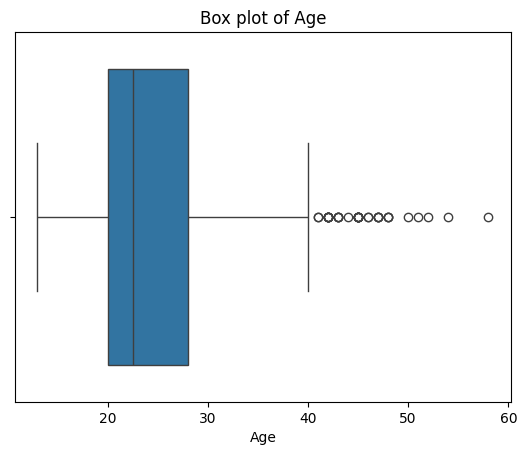

count    464.000000
mean      59.289440
std       11.148906
min       33.000000
25%       51.000000
50%       58.000000
75%       65.000000
max      100.000000
Name: Weight, dtype: float64
Median of Weight is 58.0
Skewness of Weight is 0.5616288663664292
Kurtosis of Weight is 0.2185980243257415


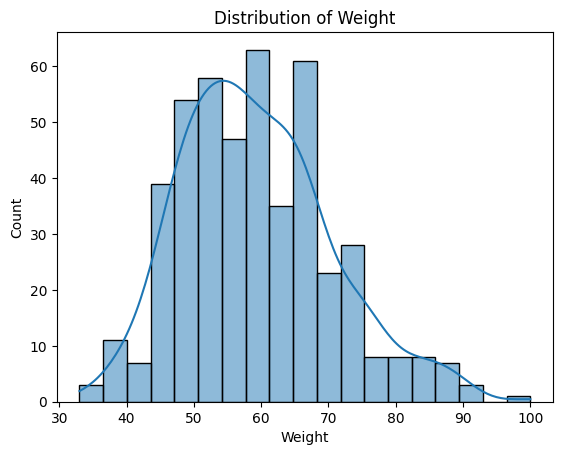

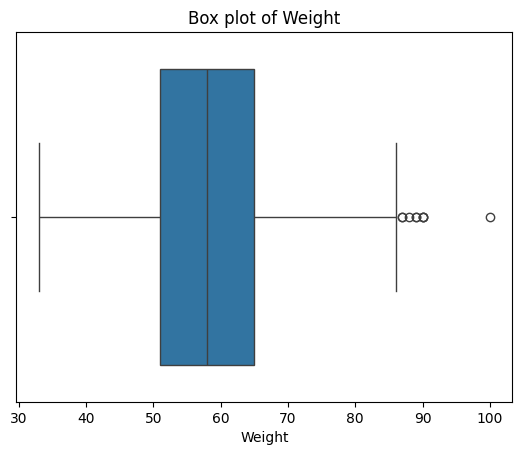

count    464.000000
mean     157.922759
std       14.948720
min        4.000000
25%      154.000000
50%      160.000000
75%      164.000000
max      186.000000
Name: Height, dtype: float64
Median of Height is 160.0
Skewness of Height is -7.3833166362810765
Kurtosis of Height is 70.73868251438668


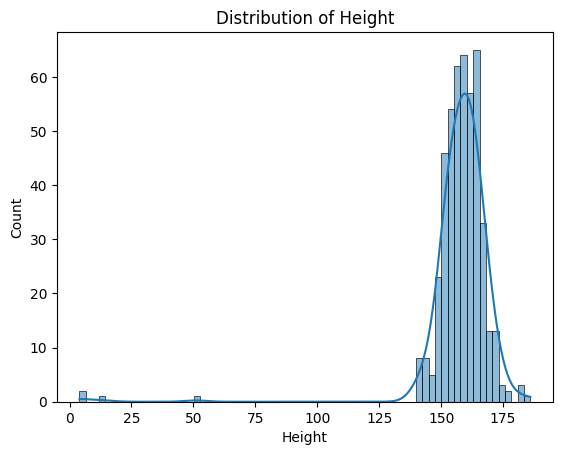

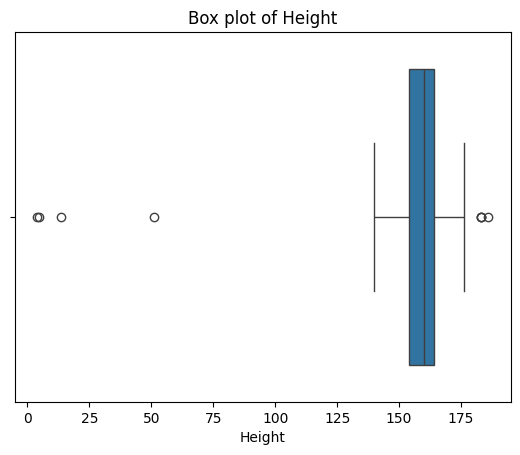

In [23]:
for col in cont_col:
    print(df[col].describe())
    print(f"Median of {col} is {df[col].median()}")
    
    print(f"Skewness of {col} is {df[col].skew()}")
    print(f"Kurtosis of {col} is {df[col].kurt()}")
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(x=col,data=df)
    plt.title(f"Box plot of {col}")
    plt.show()



In [24]:
len(df[df['Height']< 140])

4

168    51.00
345    13.46
442     4.00
444     4.70
Name: Height, dtype: float64


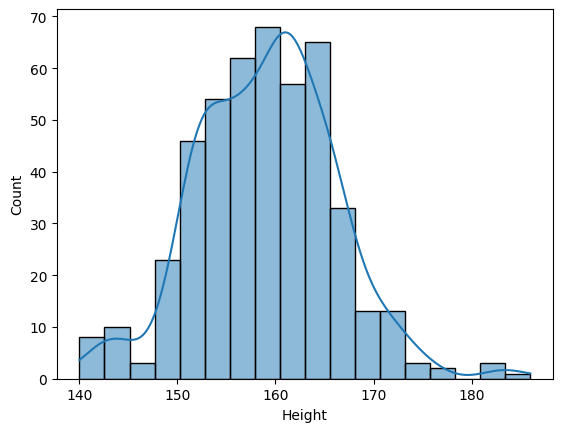

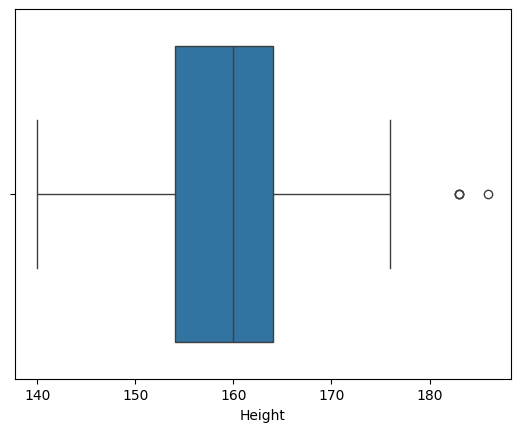

In [25]:
Q1=df['Height'].quantile(0.25)
Q2=df['Height'].quantile(0.75)

IQR=Q2-Q1
lower_bound=Q1-1.5*IQR

outliers=df[df['Height']<lower_bound]['Height']
print(outliers)

median_height=df['Height'].median()

df['Height']=df['Height'].apply(lambda x:median_height if x<lower_bound else x)

sns.histplot(df['Height'],kde=True)
plt.show()

sns.boxplot(x='Height',data=df)
plt.show()


1. Age is Right Skewed
2. Weight is Normally distributed
3. Height had some extreme outliers which are removed by replacing with its median value

In [26]:
from scipy.stats import shapiro
normal_col=[]

for col in cont_col:
    stat,p=shapiro(df[col])
    print(f"{col}- p value:{p}")

    if p>0.05:
        print(f"{col} is normally distributed")
        normal_col.append(col)

    else:
        print(f"{col} is not normally distributed")

Age- p value:3.084997559497793e-21
Age is not normally distributed
Weight- p value:1.3536605365516152e-06
Weight is not normally distributed
Height- p value:4.0900660678744316e-05
Height is not normally distributed


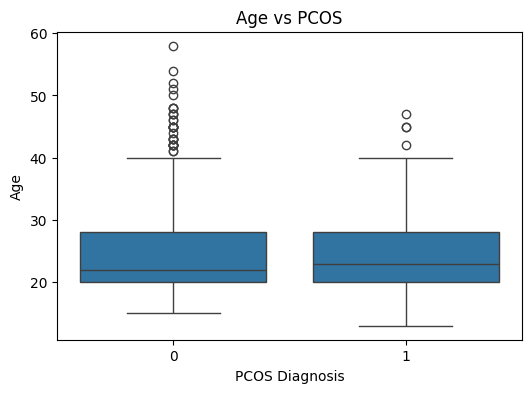

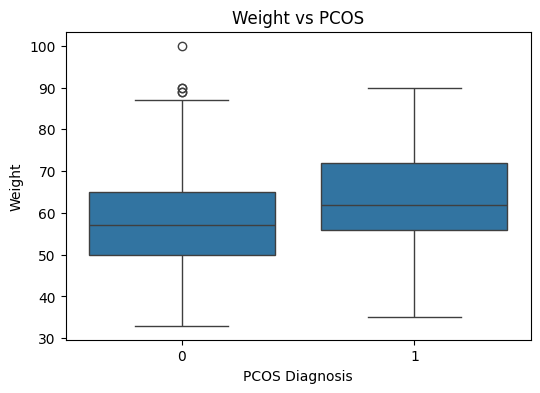

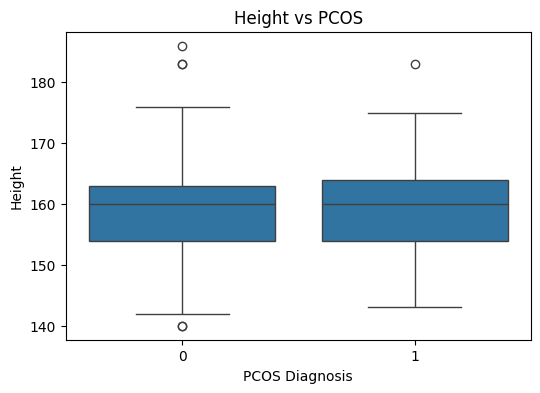

In [27]:
for col in cont_col:

    plt.figure(figsize=(6,4))
    sns.boxplot(data=df,x='PCOS Diagnosis',y=col)
    plt.title(f'{col} vs PCOS')
    plt.show()

In [28]:
#through boxplot of weight it can be oserved that average weight of PCOS patient is higher than non-PCOS patients

In [29]:
from scipy.stats import ttest_ind

for col in cont_col:
    pcos=df[df['PCOS Diagnosis']==1][col]
    nonpcos=df[df['PCOS Diagnosis']==0][col]

    stat,p=ttest_ind(pcos,nonpcos,equal_var=False)
    print(f"{col}- p value:{p}")
    if p<0.05:
        print(f"{col} is associated with PCOS")
    else:
        print(f"{col} is not associated with PCOS")

Age- p value:0.398495179652662
Age is not associated with PCOS
Weight- p value:5.70032020630623e-05
Weight is associated with PCOS
Height- p value:0.8972688060380299
Height is not associated with PCOS


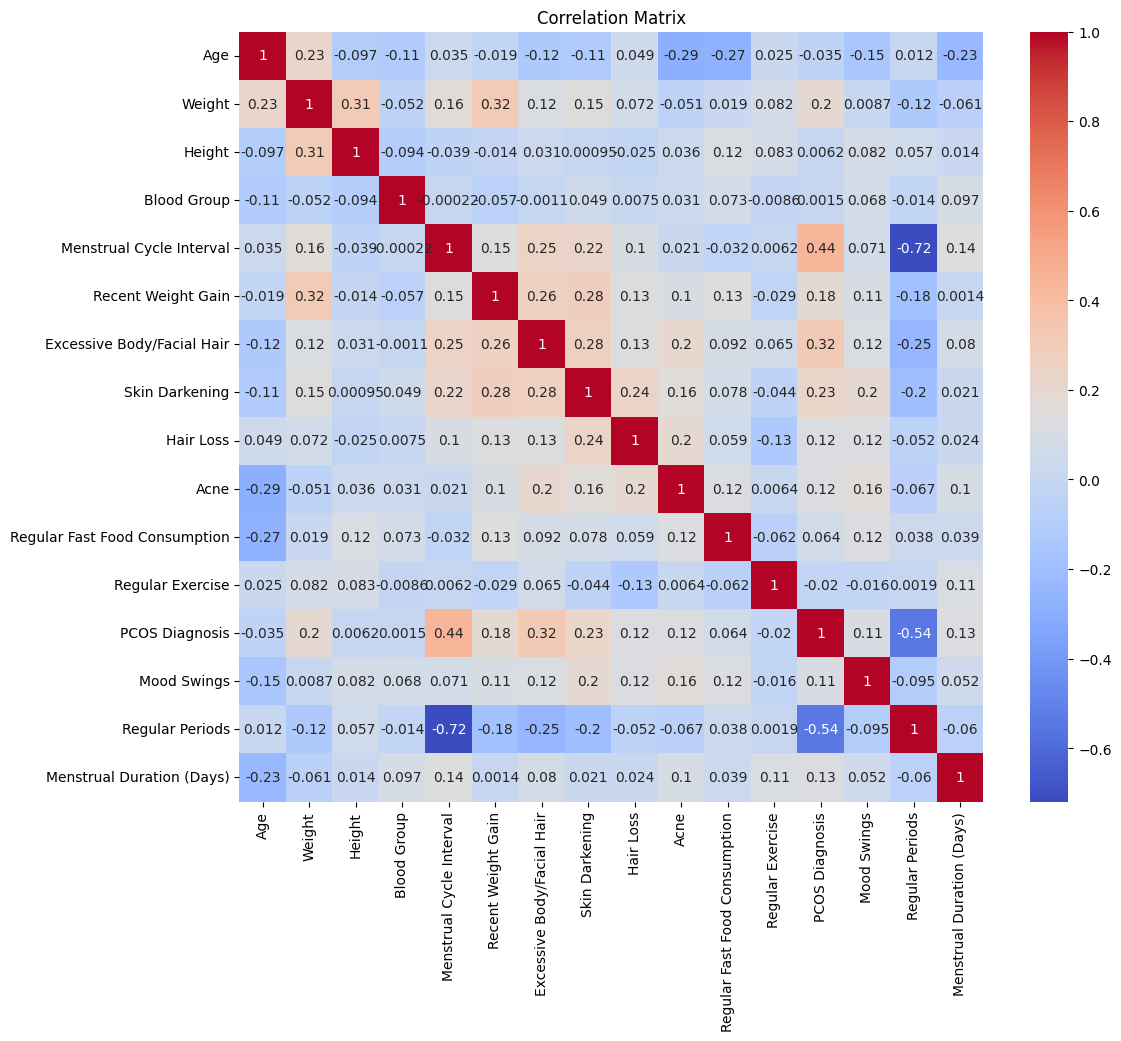

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
corr_matrix= df.corr(method='pearson')  
target_corr=corr_matrix['PCOS Diagnosis'].drop('PCOS Diagnosis')   
sorted_corr=target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)
print(f"\nFeatures sorted by absolute correlation with PCOS Diagnosis (Descending):")
print(sorted_corr)


Features sorted by absolute correlation with PCOS Diagnosis (Descending):
Regular Periods                 -0.541155
Menstrual Cycle Interval         0.439471
Excessive Body/Facial Hair       0.322153
Skin Darkening                   0.232636
Weight                           0.197785
Recent Weight Gain               0.182791
Menstrual Duration (Days)        0.126690
Hair Loss                        0.123946
Acne                             0.121240
Mood Swings                      0.112157
Regular Fast Food Consumption    0.063916
Age                             -0.035486
Regular Exercise                -0.020058
Height                           0.006200
Blood Group                      0.001546
Name: PCOS Diagnosis, dtype: float64


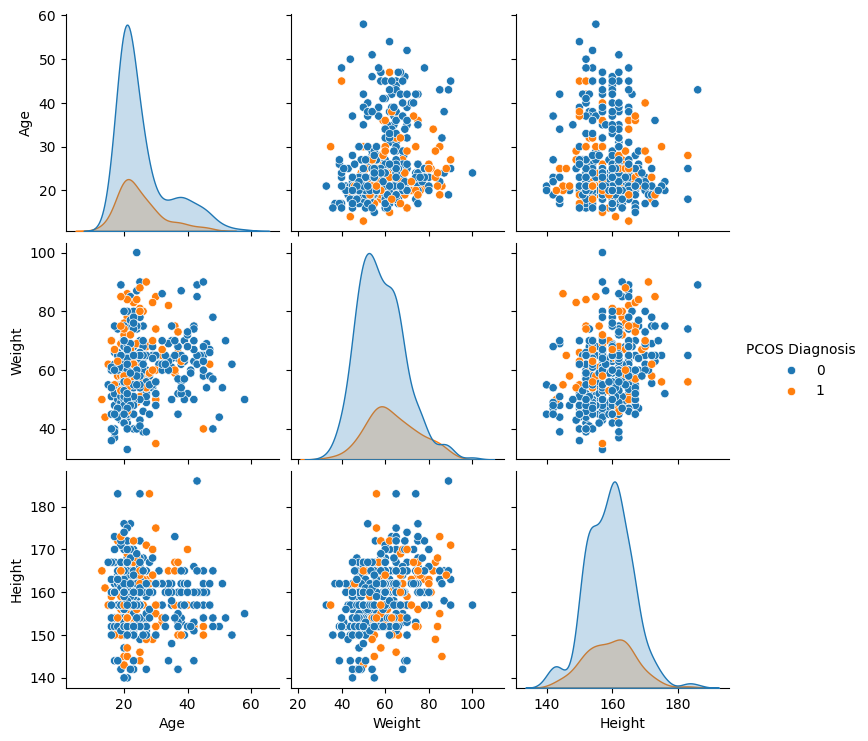

In [32]:


sns.pairplot(df,hue='PCOS Diagnosis')
plt.show()

In [33]:
# from above pairplot we can see that PCOS patients have higher weights

In [34]:
#discrete vs discrete feature

In [35]:
import itertools
dis_pair= list(itertools.combinations(dis_features_col, 2))
significant_dis_assoc={}

for col1,col2 in dis_pair:
    print(f"{col1} vs {col2}")

    temp_df=df[[col1,col2]].dropna()
    crosstab_df=pd.crosstab(temp_df[col1],temp_df[col2])

    if(min(crosstab_df.shape)>1 and crosstab_df.sum().sum()>0):

        try:
            chi2,p,dof,expected=chi2_contingency(crosstab_df)
            print(f"Chi-Squared Test Result (p-value): {p:.4f}")
            if p<0.05:
                print(f"Interpretation: There is a statistically significant association between {col1} and {col2} (p < 0.05).")
                if col1 not in significant_dis_assoc:
                    significant_dis_assoc[col1]={}
                significant_dis_assoc[col1][col2]=p
            else:
                print(f"Interpretation: No statistically significant association between {col1} and {col2} (p >= 0.05).")
        except ValueError as e:
            print(f"Error in Chi-Squared Test: {e}")
    else:
        print(f"Error: Not enough data to perform Chi-Squared Test for {col1} and {col2}.")






Blood Group vs Menstrual Cycle Interval
Chi-Squared Test Result (p-value): 0.0671
Interpretation: No statistically significant association between Blood Group and Menstrual Cycle Interval (p >= 0.05).
Blood Group vs Recent Weight Gain
Chi-Squared Test Result (p-value): 0.5240
Interpretation: No statistically significant association between Blood Group and Recent Weight Gain (p >= 0.05).
Blood Group vs Excessive Body/Facial Hair
Chi-Squared Test Result (p-value): 0.1518
Interpretation: No statistically significant association between Blood Group and Excessive Body/Facial Hair (p >= 0.05).
Blood Group vs Skin Darkening
Chi-Squared Test Result (p-value): 0.5228
Interpretation: No statistically significant association between Blood Group and Skin Darkening (p >= 0.05).
Blood Group vs Hair Loss
Chi-Squared Test Result (p-value): 0.6479
Interpretation: No statistically significant association between Blood Group and Hair Loss (p >= 0.05).
Blood Group vs Acne
Chi-Squared Test Result (p-value)

In [36]:
for index,value in significant_dis_assoc.items():
    print(f"{index} is associated with PCOS with p-value {value}")

Blood Group is associated with PCOS with p-value {'Mood Swings': 0.017063433190280766, 'Menstrual Duration (Days)': 0.001780324153553214}
Menstrual Cycle Interval is associated with PCOS with p-value {'Recent Weight Gain': 0.005669565394570928, 'Excessive Body/Facial Hair': 6.676890665040894e-08, 'Skin Darkening': 3.3221649553651586e-06, 'Regular Periods': 7.28562900725196e-57, 'Menstrual Duration (Days)': 1.6713538288026996e-09}
Recent Weight Gain is associated with PCOS with p-value {'Excessive Body/Facial Hair': 4.5178937847148726e-08, 'Skin Darkening': 2.0414361423328877e-09, 'Hair Loss': 0.007450208248308664, 'Acne': 0.03795750998105634, 'Regular Fast Food Consumption': 0.004975250914318505, 'Mood Swings': 0.02952482968611952, 'Regular Periods': 0.00011678572131956093, 'Menstrual Duration (Days)': 0.001526717783992191}
Excessive Body/Facial Hair is associated with PCOS with p-value {'Skin Darkening': 5.8372880187904106e-09, 'Hair Loss': 0.007158738638848772, 'Acne': 2.172880889259

In [37]:
##ML Modeliing

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import shap
import warnings

C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
X=df.drop('PCOS Diagnosis',axis=1)
y=df['PCOS Diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"\nTrain features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Train features shape: (371, 15)
Test features shape: (93, 15)
Train target shape: (371,)
Test target shape: (93,)


In [40]:
continuous_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())
])

discrete_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))   


])

preprocessor=ColumnTransformer(
    transformers=[
        ('num',continuous_transformer,cont_col),
        ('cat',discrete_transformer,dis_features_col)
    ]
)


In [41]:
df['PCOS Diagnosis'].dtypes

dtype('int64')

In [42]:
X_train_trans=preprocessor.fit_transform(X_train)
X_test_trans=preprocessor.transform(X_test)

In [43]:
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(dis_features_col)
    # Combine with continuous feature names
processed_feature_names = list(cont_col) + list(onehot_feature_names)
print(f"\nExample of processed feature names (first 10): {processed_feature_names[:10]}...")
print(f"Total processed features: {len(processed_feature_names)}")


Example of processed feature names (first 10): ['Age', 'Weight', 'Height', 'Blood Group_11', 'Blood Group_12', 'Blood Group_13', 'Blood Group_14', 'Blood Group_15', 'Blood Group_16', 'Menstrual Cycle Interval_1']...
Total processed features: 41


In [44]:
models={
    'Logistic Regression':  LogisticRegression(solver='liblinear',class_weight='balanced',random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced',random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True,class_weight='balanced',random_state=42),
    'KNN': KNeighborsClassifier(),
}

In [45]:
scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

results={}

for name,model in models.items():
    print(f"\nTraining and evaluating {name}...")
    try:
        cv_results = cross_validate(model, X_train_trans, y_train, cv=5, scoring=scoring, n_jobs=-1)
        results[name] = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring}
        print(f"{name} Cross-Validation Results (Mean across folds):")
        for metric, value in results[name].items():
            print(f"  {metric}: {value:.4f}")
    except Exception as e:
        print(f"Error during cross-validation for {name}: {e}")
        results[name] = {metric: np.nan for metric in scoring}

        




Training and evaluating Logistic Regression...
Logistic Regression Cross-Validation Results (Mean across folds):
  accuracy: 0.8087
  precision: 0.5482
  recall: 0.7044
  f1: 0.6162
  roc_auc: 0.8484

Training and evaluating Random Forest...
Random Forest Cross-Validation Results (Mean across folds):
  accuracy: 0.8678
  precision: 0.8000
  recall: 0.5301
  f1: 0.6370
  roc_auc: 0.8540

Training and evaluating Gradient Boosting...
Gradient Boosting Cross-Validation Results (Mean across folds):
  accuracy: 0.8599
  precision: 0.7529
  recall: 0.5551
  f1: 0.6324
  roc_auc: 0.8259

Training and evaluating SVM...
SVM Cross-Validation Results (Mean across folds):
  accuracy: 0.8357
  precision: 0.6252
  recall: 0.6412
  f1: 0.6306
  roc_auc: 0.8478

Training and evaluating KNN...
KNN Cross-Validation Results (Mean across folds):
  accuracy: 0.8653
  precision: 0.8778
  recall: 0.4566
  f1: 0.5977
  roc_auc: 0.7923


In [46]:
print("\n--- Cross-Validation Summary (Mean Scores) ---")
cv_summary_df = pd.DataFrame(results).T
print(cv_summary_df.round(4))

print("\nPotential best models based on Recall:")
print(cv_summary_df.sort_values(by='recall', ascending=False)['recall'].head())
print("\nPotential best models based on F1-Score:")
print(cv_summary_df.sort_values(by='f1', ascending=False)['f1'].head())
print("\nPotential best models based on ROC AUC:")
print(cv_summary_df.sort_values(by='roc_auc', ascending=False)['roc_auc'].head())


--- Cross-Validation Summary (Mean Scores) ---
                     accuracy  precision  recall      f1  roc_auc
Logistic Regression    0.8087     0.5482  0.7044  0.6162   0.8484
Random Forest          0.8678     0.8000  0.5301  0.6370   0.8540
Gradient Boosting      0.8599     0.7529  0.5551  0.6324   0.8259
SVM                    0.8357     0.6252  0.6412  0.6306   0.8478
KNN                    0.8653     0.8778  0.4566  0.5977   0.7923

Potential best models based on Recall:
Logistic Regression    0.704412
SVM                    0.641176
Gradient Boosting      0.555147
Random Forest          0.530147
KNN                    0.456618
Name: recall, dtype: float64

Potential best models based on F1-Score:
Random Forest          0.637037
Gradient Boosting      0.632366
SVM                    0.630577
Logistic Regression    0.616201
KNN                    0.597689
Name: f1, dtype: float64

Potential best models based on ROC AUC:
Random Forest          0.854000
Logistic Regression    0.84

In [47]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

pipeline_rf_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))])

grid_search_rf = GridSearchCV(pipeline_rf_tuned, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)

print("\nBest parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score (Recall) for Random Forest: ", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
print("\nBest tuned Random Forest model obtained.")

Performing GridSearchCV for Random Forest...

Best parameters found for Random Forest:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation score (Recall) for Random Forest:  0.6544117647058824

Best tuned Random Forest model obtained.


In [48]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

pipeline_lr_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))])

grid_search_lr = GridSearchCV(pipeline_lr_tuned, param_grid_lr, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)

print("\nBest parameters found for Logistic Regression: ", grid_search_lr.best_params_)
print("Best cross-validation score (Recall) for Logistic Regression: ", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_
print("\nBest tuned Logistic Regression model obtained.")

Performing GridSearchCV for Logistic Regression...

Best parameters found for Logistic Regression:  {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best cross-validation score (Recall) for Logistic Regression:  0.7051470588235295

Best tuned Logistic Regression model obtained.


In [49]:
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['rbf', 'linear'] # 'linear' kernel doesn't use gamma
}

pipeline_svm_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', SVC(probability=True, class_weight='balanced', random_state=42))])

grid_search_svm = GridSearchCV(pipeline_svm_tuned, param_grid_svm, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for SVM...")
grid_search_svm.fit(X_train, y_train)

print("\nBest parameters found for SVM: ", grid_search_svm.best_params_)
print("Best cross-validation score (Recall) for SVM: ", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_
print("\nBest tuned SVM model obtained.")

Performing GridSearchCV for SVM...

Best parameters found for SVM:  {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score (Recall) for SVM:  0.6911764705882353

Best tuned SVM model obtained.


In [92]:
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Pipeline includes preprocessing and the classifier (no SMOTE)
pipeline_gb_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', GradientBoostingClassifier(random_state=42))])

grid_search_gb = GridSearchCV(pipeline_gb_tuned, param_grid_gb, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Gradient Boosting...")
# Fit GridSearchCV on the ORIGINAL X_train DataFrame
grid_search_gb.fit(X_train, y_train)

print("\nBest parameters found for Gradient Boosting: ", grid_search_gb.best_params_)
print("Best cross-validation score (Recall) for Gradient Boosting: ", grid_search_gb.best_score_)

best_gb_model = grid_search_gb.best_estimator_
print("\nBest tuned Gradient Boosting model obtained.")

Performing GridSearchCV for Gradient Boosting...

Best parameters found for Gradient Boosting:  {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__max_features': 'log2', 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best cross-validation score (Recall) for Gradient Boosting:  0.6051470588235295

Best tuned Gradient Boosting model obtained.


In [50]:
print("\n--- Tuned Random Forest Evaluation ---")
y_pred_rf = best_rf_model.predict(X_test)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Tuned Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\nROC AUC Score (Tuned Random Forest): {roc_auc_rf:.4f}")


--- Tuned Random Forest Evaluation ---

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        73
           1       0.50      0.50      0.50        20

    accuracy                           0.78        93
   macro avg       0.68      0.68      0.68        93
weighted avg       0.78      0.78      0.78        93


Confusion Matrix (Tuned Random Forest):
[[63 10]
 [10 10]]

ROC AUC Score (Tuned Random Forest): 0.7233


In [51]:
print("\n--- Tuned Logistic Regression Evaluation ---")
y_pred_lr = best_lr_model.predict(X_test)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
print("\nClassification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix (Tuned Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"\nROC AUC Score (Tuned Logistic Regression): {roc_auc_lr:.4f}")


--- Tuned Logistic Regression Evaluation ---

Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        73
           1       0.46      0.55      0.50        20

    accuracy                           0.76        93
   macro avg       0.66      0.69      0.67        93
weighted avg       0.78      0.76      0.77        93


Confusion Matrix (Tuned Logistic Regression):
[[60 13]
 [ 9 11]]

ROC AUC Score (Tuned Logistic Regression): 0.7144


In [52]:
print("\n--- Tuned SVM Evaluation ---")
y_pred_svm = best_svm_model.predict(X_test)
y_proba_svm = best_svm_model.predict_proba(X_test)[:, 1]
print("\nClassification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix (Tuned SVM):")
print(confusion_matrix(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"\nROC AUC Score (Tuned SVM): {roc_auc_svm:.4f}")



--- Tuned SVM Evaluation ---

Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        73
           1       0.53      0.50      0.51        20

    accuracy                           0.80        93
   macro avg       0.70      0.69      0.69        93
weighted avg       0.79      0.80      0.79        93


Confusion Matrix (Tuned SVM):
[[64  9]
 [10 10]]

ROC AUC Score (Tuned SVM): 0.7062


In [93]:
print("\n--- Tuned Gradient Boosting Evaluation (without SMOTE) ---")
y_pred_gb = best_gb_model.predict(X_test)
y_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]
print("\nClassification Report (Tuned Gradient Boosting without SMOTE):")
print(classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix (Tuned Gradient Boosting without SMOTE):")
print(confusion_matrix(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print(f"\nROC AUC Score (Tuned Gradient Boosting without SMOTE): {roc_auc_gb:.4f}")


--- Tuned Gradient Boosting Evaluation (without SMOTE) ---

Classification Report (Tuned Gradient Boosting without SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        73
           1       0.52      0.55      0.54        20

    accuracy                           0.80        93
   macro avg       0.70      0.71      0.70        93
weighted avg       0.80      0.80      0.80        93


Confusion Matrix (Tuned Gradient Boosting without SMOTE):
[[63 10]
 [ 9 11]]

ROC AUC Score (Tuned Gradient Boosting without SMOTE): 0.6842


In [53]:
smote_df=pd.read_csv('CLEAN- PCOS SURVEY SPREADSHEET.csv')

In [54]:
smote_df = smote_df.rename(columns={
    "Age (in Years)": "Age",  
    "Weight (in Kg)": "Weight",  
    "Height (in Cm / Feet)": "Height",  
    "Can you tell us your blood group ?": "Blood Group",  
    "After how many months do you get your periods?\n(select 1- if every month/regular)": "Menstrual Cycle Interval",  
    "Have you gained weight recently?": "Recent Weight Gain",  
    "Are you noticing skin darkening recently?": "Skin Darkening",  
    "Do have hair loss/hair thinning/baldness ?": "Hair Loss",  
    "Do you have pimples/acne on your face/jawline ?": "Acne",  
    "Do you eat fast food regularly ?": "Regular Fast Food Consumption",  
    "Do you exercise on a regular basis ?": "Regular Exercise",  
    "Have you been diagnosed with PCOS/PCOD?": "PCOS Diagnosis",  
    "Do you experience mood swings ?": "Mood Swings",  
    "Are your periods regular ?": "Regular Periods",  
    "Do you have excessive body/facial hair growth ?": "Excessive Body/Facial Hair",  
    "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Menstrual Duration (Days)"  
})

In [56]:
from imblearn.over_sampling import SMOTE # Import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's pipeline for integrating SMOTE
import shap

In [59]:
smote_X=smote_df.drop('PCOS Diagnosis',axis=1)
smote_y=smote_df['PCOS Diagnosis']

In [60]:
smote_X_train, smote_X_test, smote_y_train, smote_y_test = train_test_split(smote_X, smote_y, test_size=0.25, random_state=42, stratify=smote_y)

print(f"\nTrain features shape: {smote_X_train.shape}")
print(f"Test features shape: {smote_X_test.shape}")
print(f"Train target shape: {smote_y_train.shape}")
print(f"Test target shape: {smote_y_test.shape}")


Train features shape: (348, 15)
Test features shape: (117, 15)
Train target shape: (348,)
Test target shape: (117,)


In [63]:
smote_continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

smote_discrete_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

smote_preprocessor = ColumnTransformer(
    transformers=[
        ('num', smote_continuous_transformer, cont_col),
        ('cat', smote_discrete_transformer, dis_features_col)
    ],
    remainder='passthrough'
)

In [65]:
temp_processed_X_train = smote_preprocessor.fit_transform(smote_X_train)
onehot_feature_names_smote = smote_preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(dis_features_col)
smote_processed_feature_names = list(cont_col) + list(onehot_feature_names_smote)
print(f"\nSuccessfully retrieved processed feature names for SMOTE workflow. Total: {len(smote_processed_feature_names)}")



Successfully retrieved processed feature names for SMOTE workflow. Total: 41


In [66]:
smote_models = {
    'Logistic Regression (SMOTE)': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest (SMOTE)': RandomForestClassifier(random_state=42),
    'Gradient Boosting (SMOTE)': GradientBoostingClassifier(random_state=42),
    'SVM (SMOTE)': SVC(probability=True, random_state=42),
    'KNN (SMOTE)': KNeighborsClassifier()
}

# Define scoring metrics for cross-validation
smote_scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

smote_results = {}

In [67]:
for name, model in smote_models.items():
    print(f"\nTraining and evaluating {name}...")

    # Create a pipeline that includes preprocessing, SMOTE, and the model
    smote_pipeline = ImbPipeline(steps=[('preprocessor', smote_preprocessor),
                                         ('smote', SMOTE(random_state=42)), # SMOTE step
                                         ('classifier', model)]) # Model step

    try:
        # Use cross_validate on the ORIGINAL X_train, y_train
        # The pipeline handles preprocessing and SMOTE within each fold
        smote_cv_results = cross_validate(smote_pipeline, smote_X_train, smote_y_train, cv=5, scoring=smote_scoring, n_jobs=-1)
        smote_results[name] = {metric: smote_cv_results[f'test_{metric}'].mean() for metric in smote_scoring}
        print(f"{name} Cross-Validation Results (Mean across folds):")
        for metric, value in smote_results[name].items():
            print(f"  {metric}: {value:.4f}")
    except Exception as e:
        print(f"Error during cross-validation for {name}: {e}")
        smote_results[name] = {metric: np.nan for metric in smote_scoring}


# --- Summarize Cross-Validation Results with SMOTE ---
print("\n--- Cross-Validation Summary (Mean Scores with SMOTE) ---")
smote_cv_summary_df = pd.DataFrame(smote_results).T
print(smote_cv_summary_df.round(4))

print("\nPotential best models with SMOTE based on Recall:")
print(smote_cv_summary_df.sort_values(by='recall', ascending=False)['recall'].head())
print("\nPotential best models with SMOTE based on F1-Score:")
print(smote_cv_summary_df.sort_values(by='f1', ascending=False)['f1'].head())
print("\nPotential best models with SMOTE based on ROC AUC:")
print(smote_cv_summary_df.sort_values(by='roc_auc', ascending=False)['roc_auc'].head())



Training and evaluating Logistic Regression (SMOTE)...
Logistic Regression (SMOTE) Cross-Validation Results (Mean across folds):
  accuracy: 0.8275
  precision: 0.5889
  recall: 0.6825
  f1: 0.6304
  roc_auc: 0.8490

Training and evaluating Random Forest (SMOTE)...
Random Forest (SMOTE) Cross-Validation Results (Mean across folds):
  accuracy: 0.8651
  precision: 0.7639
  recall: 0.5650
  f1: 0.6375
  roc_auc: 0.8688

Training and evaluating Gradient Boosting (SMOTE)...
Gradient Boosting (SMOTE) Cross-Validation Results (Mean across folds):
  accuracy: 0.8535
  precision: 0.6787
  recall: 0.6175
  f1: 0.6431
  roc_auc: 0.8372

Training and evaluating SVM (SMOTE)...
SVM (SMOTE) Cross-Validation Results (Mean across folds):
  accuracy: 0.8248
  precision: 0.6014
  recall: 0.5775
  f1: 0.5770
  roc_auc: 0.8320

Training and evaluating KNN (SMOTE)...
KNN (SMOTE) Cross-Validation Results (Mean across folds):
  accuracy: 0.7186
  precision: 0.4050
  recall: 0.6192
  f1: 0.4882
  roc_auc: 0.

In [68]:
smote_param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Pipeline includes preprocessing, SMOTE, and the classifier
smote_pipeline_rf_tuned = ImbPipeline(steps=[('preprocessor', smote_preprocessor),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier', RandomForestClassifier(random_state=42))])

smote_grid_search_rf = GridSearchCV(smote_pipeline_rf_tuned, smote_param_grid_rf, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Random Forest with SMOTE...")
# Fit GridSearchCV on the ORIGINAL smote_X_train DataFrame
smote_grid_search_rf.fit(smote_X_train, smote_y_train)

print("\nBest parameters found for Random Forest with SMOTE: ", smote_grid_search_rf.best_params_)
print("Best cross-validation score (Recall) for Random Forest with SMOTE: ", smote_grid_search_rf.best_score_)

best_smote_rf_model = smote_grid_search_rf.best_estimator_
print("\nBest tuned Random Forest model with SMOTE obtained.")

Performing GridSearchCV for Random Forest with SMOTE...

Best parameters found for Random Forest with SMOTE:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation score (Recall) for Random Forest with SMOTE:  0.6441666666666668

Best tuned Random Forest model with SMOTE obtained.


In [69]:
smote_param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

smote_pipeline_lr_tuned = ImbPipeline(steps=[('preprocessor', smote_preprocessor),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

smote_grid_search_lr = GridSearchCV(smote_pipeline_lr_tuned, smote_param_grid_lr, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Logistic Regression with SMOTE...")
# Fit GridSearchCV on the ORIGINAL smote_X_train DataFrame
smote_grid_search_lr.fit(smote_X_train, smote_y_train)

print("\nBest parameters found for Logistic Regression with SMOTE: ", smote_grid_search_lr.best_params_)
print("Best cross-validation score (Recall) for Logistic Regression with SMOTE: ", smote_grid_search_lr.best_score_)

best_smote_lr_model = smote_grid_search_lr.best_estimator_
print("\nBest tuned Logistic Regression model with SMOTE obtained.")


Performing GridSearchCV for Logistic Regression with SMOTE...

Best parameters found for Logistic Regression with SMOTE:  {'classifier__C': 1, 'classifier__penalty': 'l1'}
Best cross-validation score (Recall) for Logistic Regression with SMOTE:  0.71

Best tuned Logistic Regression model with SMOTE obtained.


In [70]:
smote_param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['rbf', 'linear']
}

smote_pipeline_svm_tuned = ImbPipeline(steps=[('preprocessor', smote_preprocessor),
                                              ('smote', SMOTE(random_state=42)),
                                              ('classifier', SVC(probability=True, random_state=42))])

smote_grid_search_svm = GridSearchCV(smote_pipeline_svm_tuned, smote_param_grid_svm, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for SVM with SMOTE...")
# Fit GridSearchCV on the ORIGINAL smote_X_train DataFrame
smote_grid_search_svm.fit(smote_X_train, smote_y_train)

print("\nBest parameters found for SVM with SMOTE: ", smote_grid_search_svm.best_params_)
print("Best cross-validation score (Recall) for SVM with SMOTE: ", smote_grid_search_svm.best_score_)

best_smote_svm_model = smote_grid_search_svm.best_estimator_
print("\nBest tuned SVM model with SMOTE obtained.")


Performing GridSearchCV for SVM with SMOTE...

Best parameters found for SVM with SMOTE:  {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score (Recall) for SVM with SMOTE:  0.6833333333333333

Best tuned SVM model with SMOTE obtained.


In [71]:
y_pred_smote_rf = best_smote_rf_model.predict(smote_X_test)
y_proba_smote_rf = best_smote_rf_model.predict_proba(smote_X_test)[:, 1]
print("\nClassification Report (Tuned Random Forest with SMOTE):")
print(classification_report(smote_y_test, y_pred_smote_rf))
print("\nConfusion Matrix (Tuned Random Forest with SMOTE):")
print(confusion_matrix(smote_y_test, y_pred_smote_rf))
roc_auc_smote_rf = roc_auc_score(smote_y_test, y_proba_smote_rf)
print(f"\nROC AUC Score (Tuned Random Forest with SMOTE): {roc_auc_smote_rf:.4f}")



Classification Report (Tuned Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        91
           1       0.59      0.50      0.54        26

    accuracy                           0.81       117
   macro avg       0.73      0.70      0.71       117
weighted avg       0.80      0.81      0.81       117


Confusion Matrix (Tuned Random Forest with SMOTE):
[[82  9]
 [13 13]]

ROC AUC Score (Tuned Random Forest with SMOTE): 0.7219


In [72]:
y_pred_smote_lr = best_smote_lr_model.predict(smote_X_test)
y_proba_smote_lr = best_smote_lr_model.predict_proba(smote_X_test)[:, 1]
print("\nClassification Report (Tuned Logistic Regression with SMOTE):")
print(classification_report(smote_y_test, y_pred_smote_lr))
print("\nConfusion Matrix (Tuned Logistic Regression with SMOTE):")
print(confusion_matrix(smote_y_test, y_pred_smote_lr))
roc_auc_smote_lr = roc_auc_score(smote_y_test, y_proba_smote_lr)
print(f"\nROC AUC Score (Tuned Logistic Regression with SMOTE): {roc_auc_smote_lr:.4f}")



Classification Report (Tuned Logistic Regression with SMOTE):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        91
           1       0.50      0.54      0.52        26

    accuracy                           0.78       117
   macro avg       0.68      0.69      0.69       117
weighted avg       0.78      0.78      0.78       117


Confusion Matrix (Tuned Logistic Regression with SMOTE):
[[77 14]
 [12 14]]

ROC AUC Score (Tuned Logistic Regression with SMOTE): 0.6978


In [73]:
y_pred_smote_svm = best_smote_svm_model.predict(smote_X_test)
y_proba_smote_svm = best_smote_svm_model.predict_proba(smote_X_test)[:, 1]
print("\nClassification Report (Tuned SVM with SMOTE):")
print(classification_report(smote_y_test, y_pred_smote_svm))
print("\nConfusion Matrix (Tuned SVM with SMOTE):")
print(confusion_matrix(smote_y_test, y_pred_smote_svm))
roc_auc_smote_svm = roc_auc_score(smote_y_test, y_proba_smote_svm)
print(f"\nROC AUC Score (Tuned SVM with SMOTE): {roc_auc_smote_svm:.4f}")


Classification Report (Tuned SVM with SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        91
           1       0.44      0.54      0.48        26

    accuracy                           0.74       117
   macro avg       0.65      0.67      0.66       117
weighted avg       0.77      0.74      0.75       117


Confusion Matrix (Tuned SVM with SMOTE):
[[73 18]
 [12 14]]

ROC AUC Score (Tuned SVM with SMOTE): 0.6598


In [74]:
smote_param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Pipeline includes preprocessing, SMOTE, and the classifier
smote_pipeline_gb_tuned = ImbPipeline(steps=[('preprocessor', smote_preprocessor),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier', GradientBoostingClassifier(random_state=42))])

smote_grid_search_gb = GridSearchCV(smote_pipeline_gb_tuned, smote_param_grid_gb, cv=5, scoring='recall', n_jobs=-1)

print("Performing GridSearchCV for Gradient Boosting with SMOTE...")
# Fit GridSearchCV on the ORIGINAL smote_X_train DataFrame
smote_grid_search_gb.fit(smote_X_train, smote_y_train)

print("\nBest parameters found for Gradient Boosting with SMOTE: ", smote_grid_search_gb.best_params_)
print("Best cross-validation score (Recall) for Gradient Boosting with SMOTE: ", smote_grid_search_gb.best_score_)

best_smote_gb_model = smote_grid_search_gb.best_estimator_
print("\nBest tuned Gradient Boosting model with SMOTE obtained.")

Performing GridSearchCV for Gradient Boosting with SMOTE...

Best parameters found for Gradient Boosting with SMOTE:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best cross-validation score (Recall) for Gradient Boosting with SMOTE:  0.6716666666666666

Best tuned Gradient Boosting model with SMOTE obtained.


In [75]:
y_pred_smote_gb = best_smote_gb_model.predict(smote_X_test)
y_proba_smote_gb = best_smote_gb_model.predict_proba(smote_X_test)[:, 1]
print("\nClassification Report (Tuned Gradient Boosting with SMOTE):")
print(classification_report(smote_y_test, y_pred_smote_gb))
print("\nConfusion Matrix (Tuned Gradient Boosting with SMOTE):")
print(confusion_matrix(smote_y_test, y_pred_smote_gb))
roc_auc_smote_gb = roc_auc_score(smote_y_test, y_proba_smote_gb)
print(f"\nROC AUC Score (Tuned Gradient Boosting with SMOTE): {roc_auc_smote_gb:.4f}")


Classification Report (Tuned Gradient Boosting with SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        91
           1       0.43      0.50      0.46        26

    accuracy                           0.74       117
   macro avg       0.64      0.66      0.65       117
weighted avg       0.76      0.74      0.75       117


Confusion Matrix (Tuned Gradient Boosting with SMOTE):
[[74 17]
 [13 13]]

ROC AUC Score (Tuned Gradient Boosting with SMOTE): 0.7101


In [76]:
if smote_processed_feature_names and hasattr(best_smote_lr_model.named_steps['classifier'], 'coef_'):
    smote_lr_coefficients = pd.Series(best_smote_lr_model.named_steps['classifier'].coef_[0], index=smote_processed_feature_names)
    sorted_smote_lr_coefficients = smote_lr_coefficients.reindex(smote_lr_coefficients.abs().sort_values(ascending=False).index)
    print(sorted_smote_lr_coefficients.round(4))

    print("\nInterpretation of LR Coefficients (SMOTE):")
    print("- Coefficients represent the change in log-odds of PCOS per unit/std dev change on the SMOTEd data.")
    print("- Odds Ratios (exp(coef)) indicate the multiplicative change in odds.")
    print("  - Interpretation is similar to before, but reflects the model learned on the balanced dataset.")


    print("\nTop 10 Features by Odds Ratio (Magnitude) from Tuned LR Model with SMOTE:")
    smote_lr_odds_ratios = np.exp(smote_lr_coefficients)
    sorted_smote_lr_odds_ratios = smote_lr_odds_ratios.reindex(smote_lr_odds_ratios.abs().sort_values(ascending=False).index)
    print(sorted_smote_lr_odds_ratios.head(10).round(4))

else:
    print("Processed feature names or Tuned LR coefficients with SMOTE not available.")


Menstrual Duration (Days)_8        3.1028
Menstrual Duration (Days)_0       -3.0795
Menstrual Duration (Days)_7        2.6657
Regular Periods_0                  2.0285
Regular Periods_1                 -1.3666
Menstrual Duration (Days)_6       -0.8081
Blood Group_15                    -0.7929
Menstrual Duration (Days)_10       0.7106
Weight                             0.6350
Regular Exercise_1                -0.5939
Acne_1                             0.5837
Mood Swings_1                      0.4680
Mood Swings_0                     -0.4096
Menstrual Duration (Days)_5       -0.4094
Excessive Body/Facial Hair_0      -0.3741
Skin Darkening_1                   0.3428
Menstrual Duration (Days)_2       -0.3307
Recent Weight Gain_0              -0.2711
Acne_0                            -0.2440
Menstrual Duration (Days)_4        0.2406
Regular Fast Food Consumption_1    0.2331
Blood Group_13                     0.2167
Age                               -0.1646
Excessive Body/Facial Hair_1      

In [77]:
if smote_processed_feature_names and hasattr(best_smote_rf_model.named_steps['classifier'], 'feature_importances_'):
    smote_rf_importances = pd.Series(best_smote_rf_model.named_steps['classifier'].feature_importances_, index=smote_processed_feature_names)
    sorted_smote_rf_importances = smote_rf_importances.sort_values(ascending=False)
    print(sorted_smote_rf_importances.round(4))

    print("\nInterpretation of RF Feature Importance (SMOTE):")
    print("- Importance scores reflect feature utility for splitting nodes on the SMOTEd data.")


else:
    print("Random Forest feature importances with SMOTE not available.")


Regular Periods_0                  0.1664
Regular Periods_1                  0.1464
Menstrual Cycle Interval_1         0.0778
Weight                             0.0472
Age                                0.0412
Skin Darkening_1                   0.0409
Menstrual Duration (Days)_7        0.0389
Skin Darkening_0                   0.0383
Height                             0.0351
Acne_0                             0.0347
Menstrual Cycle Interval_2         0.0324
Acne_1                             0.0301
Excessive Body/Facial Hair_1       0.0260
Excessive Body/Facial Hair_0       0.0230
Blood Group_13                     0.0224
Blood Group_15                     0.0210
Recent Weight Gain_0               0.0187
Recent Weight Gain_1               0.0186
Menstrual Duration (Days)_4        0.0180
Mood Swings_1                      0.0153
Mood Swings_0                      0.0147
Menstrual Cycle Interval_3         0.0135
Menstrual Duration (Days)_5        0.0119
Regular Fast Food Consumption_0   

In [78]:
print("\nGradient Boosting Feature Importance (from Tuned GB Model with SMOTE - Mean Decrease in Impurity):")
# Gradient Boosting also has feature_importances_
if smote_processed_feature_names and hasattr(best_smote_gb_model.named_steps['classifier'], 'feature_importances_'):
    smote_gb_importances = pd.Series(best_smote_gb_model.named_steps['classifier'].feature_importances_, index=smote_processed_feature_names)
    sorted_smote_gb_importances = smote_gb_importances.sort_values(ascending=False)
    print(sorted_smote_gb_importances.round(4))

    print("\nInterpretation of GB Feature Importance (SMOTE):")
    print("- Similar to Random Forest, this score is based on impurity reduction across the boosting stages on the SMOTEd data.")


else:
    print("Gradient Boosting feature importances with SMOTE not available.")


Gradient Boosting Feature Importance (from Tuned GB Model with SMOTE - Mean Decrease in Impurity):
Regular Periods_0                  0.3289
Regular Periods_1                  0.2997
Menstrual Duration (Days)_7        0.1715
Age                                0.0599
Height                             0.0457
Menstrual Duration (Days)_8        0.0248
Weight                             0.0153
Skin Darkening_1                   0.0060
Skin Darkening_0                   0.0058
Menstrual Duration (Days)_10       0.0050
Blood Group_13                     0.0046
Acne_1                             0.0037
Menstrual Cycle Interval_1         0.0037
Acne_0                             0.0036
Menstrual Cycle Interval_2         0.0029
Mood Swings_1                      0.0027
Blood Group_15                     0.0025
Menstrual Duration (Days)_0        0.0021
Menstrual Duration (Days)_4        0.0019
Menstrual Duration (Days)_5        0.0019
Recent Weight Gain_0               0.0013
Hair Loss_0       


Generating SHAP Summary Plot for Tuned Random Forest with SMOTE...
Shape of X_sample_for_shap: (100, 41)
Type of X_sample_for_shap: <class 'numpy.ndarray'>
Shape of shap_values_smote: (100, 41, 2)
Type of shap_values_smote: <class 'numpy.ndarray'>
Shape of shap_values_positive_class (from 3D array slice): (100, 41)


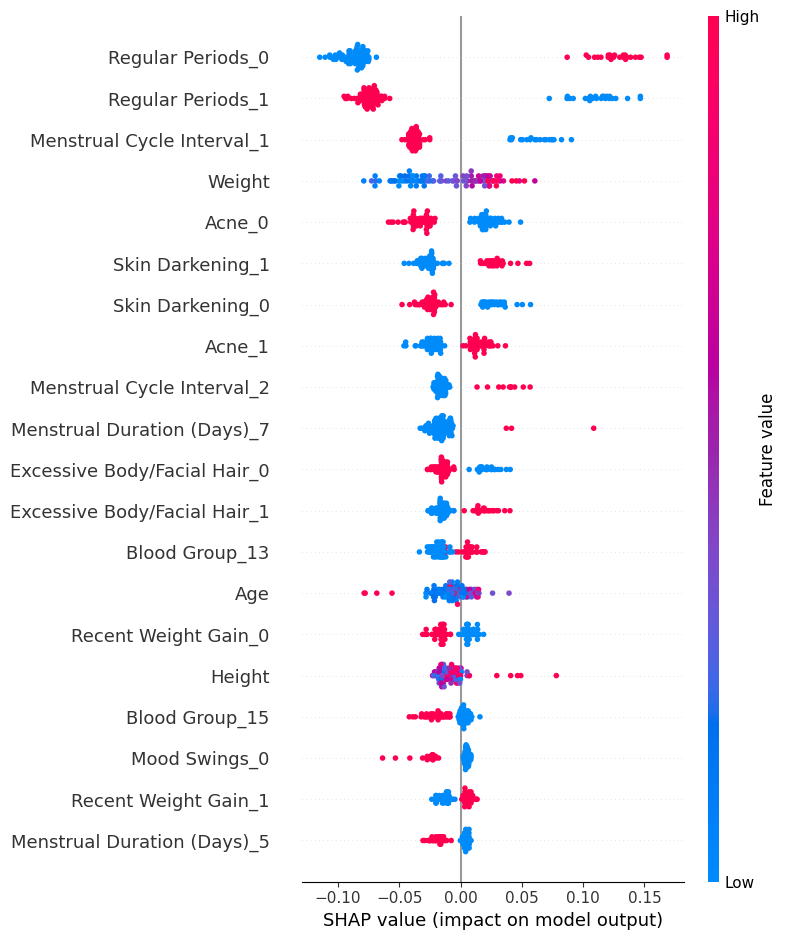

<Figure size 640x480 with 0 Axes>

In [82]:
print("\nGenerating SHAP Summary Plot for Tuned Random Forest with SMOTE...")

try:
    # SHAP needs the data that was fed into the classifier step of the pipeline
    # We need to transform X_train using the preprocessor from the best_smote_rf_model pipeline
    explainer_smote = shap.TreeExplainer(best_smote_rf_model.named_steps['classifier'])
    # Access the preprocessor from the tuned pipeline to ensure consistent transformation
    X_train_transformed_for_shap_smote = best_smote_rf_model.named_steps['preprocessor'].transform(smote_X_train)

    # Calculate SHAP values for a sample of the training data (can be slow on large datasets)
    # Using a smaller sample for faster computation
    X_sample_for_shap = X_train_transformed_for_shap_smote[:100] # Take the data sample first

    # --- Debugging Prints ---
    print(f"Shape of X_sample_for_shap: {np.shape(X_sample_for_shap)}")
    print(f"Type of X_sample_for_shap: {type(X_sample_for_shap)}")
    # --- End Debugging Prints ---


    shap_values_smote = explainer_smote.shap_values(X_sample_for_shap) # Calculate SHAP for the sample

    # --- Debugging Prints ---
    print(f"Shape of shap_values_smote: {np.shape(shap_values_smote)}")
    print(f"Type of shap_values_smote: {type(shap_values_smote)}")
    # --- End Debugging Prints ---


    # Get the SHAP values for the positive class
    # For multi-output models (like multi-class classification), shap_values returns a list.
    # For binary classification, it might return a list of two arrays (one per class)
    # or sometimes a single array depending on the explainer/version.
    if isinstance(shap_values_smote, list) and len(shap_values_smote) > 1:
        shap_values_positive_class = shap_values_smote[1] # SHAP values for the positive class (index 1)
        print(f"Shape of shap_values_positive_class (from list): {np.shape(shap_values_positive_class)}") # Updated print
    elif isinstance(shap_values_smote, np.ndarray) and shap_values_smote.ndim == 3: # Check if it's a 3D array
         # If it's a 3D array (samples, features, classes), slice for the positive class
         shap_values_positive_class = shap_values_smote[:, :, 1] # Take the slice for the positive class
         print(f"Shape of shap_values_positive_class (from 3D array slice): {np.shape(shap_values_positive_class)}") # Updated print
    elif isinstance(shap_values_smote, np.ndarray) and shap_values_smote.ndim == 2:
         # If it's a 2D array, assume it's for the positive class (common for some binary explainers)
         shap_values_positive_class = shap_values_smote
         print(f"Shape of shap_values_positive_class (from 2D array): {np.shape(shap_values_positive_class)}") # Updated print
    else:
         print("Unexpected type or shape for shap_values_smote")
         raise TypeError("Unexpected SHAP values format")


    if smote_processed_feature_names:
         # Ensure the number of feature names matches the number of features in the SHAP values
         if len(smote_processed_feature_names) == shap_values_positive_class.shape[1]:
             shap_feature_names_smote = smote_processed_feature_names
         else:
             print(f"Warning: Number of processed feature names ({len(smote_processed_feature_names)}) does not match SHAP values feature dimension ({shap_values_positive_class.shape[1]}). Using generic names.")
             shap_feature_names_smote = [f'feature_{i}' for i in range(X_train_transformed_for_shap_smote.shape[1])]

    else:
         shap_feature_names_smote = [f'feature_{i}' for i in range(X_train_transformed_for_shap_smote.shape[1])]
         print("Using generic feature names for SHAP plot as specific names were not available.")

    # SHAP summary plot (shows overall importance and impact direction)
    # Pass the SHAP values for the positive class and the corresponding data sample
    shap.summary_plot(shap_values_positive_class, X_sample_for_shap, feature_names=shap_feature_names_smote)
    plt.suptitle('SHAP Summary Plot (SMOTE - Impact on PCOS Diagnosis=1)', y=1.02)
    plt.show()

except Exception as e:
    print(f"\nError generating SHAP plot with SMOTE: {e}")
    print("SHAP might not be compatible with all models or require specific configurations.")


In [89]:
if smote_processed_feature_names and 'best_smote_lr_model' in locals() and 'shap_values_smote' in locals() and 'best_smote_rf_model' in locals() and 'best_smote_gb_model' in locals() and hasattr(best_smote_lr_model.named_steps['classifier'], 'coef_') and hasattr(best_smote_rf_model.named_steps['classifier'], 'feature_importances_') and hasattr(best_smote_gb_model.named_steps['classifier'], 'feature_importances_'):

    # Recalculate LR coefficients and Odds Ratios from the best tuned LR model with SMOTE
    smote_lr_coefficients_tuned = pd.Series(best_smote_lr_model.named_steps['classifier'].coef_[0], index=smote_processed_feature_names)
    smote_lr_odds_ratios_tuned = np.exp(smote_lr_coefficients_tuned)

    # Get RF importances from the best tuned RF model with SMOTE
    smote_rf_importances_tuned = pd.Series(best_smote_rf_model.named_steps['classifier'].feature_importances_, index=smote_processed_feature_names)

    # Get GB importances from the best tuned GB model with SMOTE
    smote_gb_importances_tuned = pd.Series(best_smote_gb_model.named_steps['classifier'].feature_importances_, index=smote_processed_feature_names)

    # Get XGBoost importances from the best tuned XGBoost model with SMOTE (only if available)
    # This part remains but is now conditional on best_smote_xgb_model existing
    smote_xgb_importances_tuned = None # Initialize to None
    if 'best_smote_xgb_model' in locals() and hasattr(best_smote_xgb_model.named_steps['classifier'], 'feature_importances_'):
         smote_xgb_importances_tuned = pd.Series(best_smote_xgb_model.named_steps['classifier'].feature_importances_, index=smote_processed_feature_names)


    # Calculate mean absolute SHAP value for each feature (as a measure of importance)
    # Using SHAP values calculated from the tuned RF model with SMOTE
    # Need to ensure shap_values_smote is available and correctly structured
    if 'shap_values_smote' in locals() and isinstance(shap_values_smote, list) and len(shap_values_smote) > 1:
        mean_abs_shap_values_smote = np.mean(np.abs(shap_values_smote[1]), axis=0)
        # Ensure the index matches the number of features
        if len(smote_processed_feature_names) == mean_abs_shap_values_smote.shape[0]:
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=smote_processed_feature_names)
        else:
             print("Warning: Feature name count mismatch for SHAP importance series. Using generic names.")
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=[f'feature_{i}' for i in range(mean_abs_shap_values_smote.shape[0])])

    elif 'shap_values_smote' in locals() and isinstance(shap_values_smote, np.ndarray) and shap_values_smote.ndim == 3:
         # If it's a 3D array, calculate mean abs SHAP for the positive class slice
         mean_abs_shap_values_smote = np.mean(np.abs(shap_values_smote[:, :, 1]), axis=0)
         # Ensure the index matches the number of features
         if smote_processed_feature_names and len(smote_processed_feature_names) == mean_abs_shap_values_smote.shape[0]:
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=smote_processed_feature_names)
         else:
             print("Warning: Feature name count mismatch for SHAP importance series (3D array). Using generic names.")
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=[f'feature_{i}' for i in range(mean_abs_shap_values_smote.shape[0])])

    elif 'shap_values_smote' in locals() and isinstance(shap_values_smote, np.ndarray) and shap_values_smote.ndim == 2:
         # If it's a 2D array, calculate mean abs SHAP directly
         mean_abs_shap_values_smote = np.mean(np.abs(shap_values_smote), axis=0)
         # Ensure the index matches the number of features
         if smote_processed_feature_names and len(smote_processed_feature_names) == mean_abs_shap_values_smote.shape[0]:
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=smote_processed_feature_names)
         else:
             print("Warning: Feature name count mismatch for SHAP importance series (2D array). Using generic names.")
             shap_importance_series_smote = pd.Series(mean_abs_shap_values_smote, index=[f'feature_{i}' for i in range(mean_abs_shap_values_smote.shape[0])])

    else:
         print("SHAP values not available or in unexpected format for summary table calculation.")
         # Set importance to NaN or handle appropriately
         shap_importance_series_smote = pd.Series(np.nan, index=smote_processed_feature_names if smote_processed_feature_names else [f'feature_{i}' for i in range(X_sample_for_shap.shape[1])])


    summary_table_data = {
        'LR_Coefficient': smote_lr_coefficients_tuned,
        'LR_Odds_Ratio': smote_lr_odds_ratios_tuned,
        'RF_Importance': smote_rf_importances_tuned,
        'GB_Importance': smote_gb_importances_tuned,
        'SHAP_Mean_Abs_Importance': shap_importance_series_smote
    }

    # Add XGBoost importance only if it was calculated
    if smote_xgb_importances_tuned is not None:
        summary_table_data['XGBoost_Importance'] = smote_xgb_importances_tuned


    summary_table_df = pd.DataFrame(summary_table_data)

    # Sort by SHAP importance (or another metric if preferred)
    summary_table_df = summary_table_df.sort_values(by='SHAP_Mean_Abs_Importance', ascending=False)

    print("\nFeature Summary Table (with SMOTE - Sorted by SHAP Importance):")
    print(summary_table_df.round(4))

    print("\nNote on Interpretation (SMOTE):")
    print("- Metrics are calculated on models trained with SMOTEd data.")
    print("- 'LR_Coefficient' and 'LR_Odds_Ratio' reflect impact on log-odds/odds on the balanced data distribution.")
    print("- 'RF_Importance', 'GB_Importance' reflect feature utility/impact on the balanced data distribution.")
    print("- 'XGBoost_Importance' reflects feature utility/impact on the balanced data distribution (if XGBoost was used).") # Updated note
    print("  - Compare these results to the non-SMOTE results to see how balancing affected perceived feature importance.")


else:
    print("Could not generate the summary table with SMOTE. Ensure necessary components (LR, RF, GB models, processed feature names, and SHAP values) were successfully obtained.") # Updated error message


print("\n--- ML Model Building and Analysis with SMOTE Complete ---")




Feature Summary Table (with SMOTE - Sorted by SHAP Importance):
                                 LR_Coefficient  LR_Odds_Ratio  RF_Importance  \
Regular Periods_0                        2.0285         7.6027         0.1664   
Regular Periods_1                       -1.3666         0.2550         0.1464   
Menstrual Cycle Interval_1              -0.1050         0.9003         0.0778   
Weight                                   0.6350         1.8870         0.0472   
Acne_0                                  -0.2440         0.7835         0.0347   
Skin Darkening_1                         0.3428         1.4089         0.0409   
Skin Darkening_0                        -0.0643         0.9377         0.0383   
Acne_1                                   0.5837         1.7926         0.0301   
Menstrual Cycle Interval_2               0.0000         1.0000         0.0324   
Menstrual Duration (Days)_7              2.6657        14.3777         0.0389   
Excessive Body/Facial Hair_0            -0.3

In [90]:
test_case_data = {
    "Age": 23,
    "Weight": 55,
    "Height": 160,
    "Blood Group": 13,
    "Menstrual Cycle Interval": 2,
    "Recent Weight Gain": 1,
    "Skin Darkening": 1,
    "Hair Loss": 1,
    "Acne": 1,
    "Regular Fast Food Consumption": 1,
    "Regular Exercise": 0,
    "Mood Swings": 1,
    "Regular Periods": 0,
    "Excessive Body/Facial Hair": 0,
    "Menstrual Duration (Days)": 7
}

# Define feature lists (must match the order used during training)
continuous_features = ['Age', 'Weight', 'Height']
discrete_features = ['Blood Group', 'Menstrual Cycle Interval', 'Recent Weight Gain',
                     'Excessive Body/Facial Hair', 'Skin Darkening', 'Hair Loss',
                     'Acne', 'Regular Fast Food Consumption', 'Regular Exercise',
                     'Mood Swings', 'Regular Periods', 'Menstrual Duration (Days)']
all_features = continuous_features + discrete_features

# Convert test case to DataFrame
test_case_df = pd.DataFrame([test_case_data], columns=all_features)

# Ensure best_lr_model is available from running the previous script
# If running separately, load the model and preprocessor here

# Make prediction using the tuned LR model pipeline
try:
    predicted_class = best_lr_model.predict(test_case_df)
    print(f"Predicted Class (0: No PCOS, 1: PCOS): {predicted_class[0]}")
except NameError:
    print("Error: 'best_lr_model' is not found. Ensure the model training script has been run.")
except Exception as e:
    print(f"An error occurred during prediction: {e}")


Predicted Class (0: No PCOS, 1: PCOS): 1


In [91]:
test_case_data = {
    "Age": 23,
    "Weight": 55,
    "Height": 160,
    "Blood Group": 13,
    "Menstrual Cycle Interval": 1,
    "Recent Weight Gain": 1,
    "Skin Darkening": 0,
    "Hair Loss": 0,
    "Acne": 0,
    "Regular Fast Food Consumption": 1,
    "Regular Exercise": 0,
    "Mood Swings": 1,
    "Regular Periods": 1,
    "Excessive Body/Facial Hair": 0,
    "Menstrual Duration (Days)": 7
}

# Define feature lists (must match the order used during training)
continuous_features = ['Age', 'Weight', 'Height']
discrete_features = ['Blood Group', 'Menstrual Cycle Interval', 'Recent Weight Gain',
                     'Excessive Body/Facial Hair', 'Skin Darkening', 'Hair Loss',
                     'Acne', 'Regular Fast Food Consumption', 'Regular Exercise',
                     'Mood Swings', 'Regular Periods', 'Menstrual Duration (Days)']
all_features = continuous_features + discrete_features

# Convert test case to DataFrame
test_case_df = pd.DataFrame([test_case_data], columns=all_features)

# Ensure best_lr_model is available from running the previous script
# If running separately, load the model and preprocessor here

# Make prediction using the tuned LR model pipeline
try:
    predicted_class = best_lr_model.predict(test_case_df)
    print(f"Predicted Class (0: No PCOS, 1: PCOS): {predicted_class[0]}")
except NameError:
    print("Error: 'best_lr_model' is not found. Ensure the model training script has been run.")
except Exception as e:
    print(f"An error occurred during prediction: {e}")


Predicted Class (0: No PCOS, 1: PCOS): 0


In [94]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier # Import VotingClassifier
estimators = [
    ('lr', best_lr_model),
    ('rf', best_rf_model),
    ('svm', best_svm_model),
    ('gb', best_gb_model)
]

# Create the Voting Classifier
# 'voting='soft'' uses predicted probabilities, which is generally preferred
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

print("Training Voting Classifier...")
# Train the Voting Classifier on the original training data (pipeline handles preprocessing)
voting_clf.fit(X_train, y_train)
print("Voting Classifier trained.")

print("\nEvaluating Voting Classifier on Test Set...")
# Predict on the original test data (pipeline handles preprocessing)
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))

print("\nConfusion Matrix (Voting Classifier):")
print(confusion_matrix(y_test, y_pred_voting))

roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
print(f"\nROC AUC Score (Voting Classifier): {roc_auc_voting:.4f}")

Training Voting Classifier...
Voting Classifier trained.

Evaluating Voting Classifier on Test Set...

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        73
           1       0.56      0.50      0.53        20

    accuracy                           0.81        93
   macro avg       0.71      0.70      0.70        93
weighted avg       0.80      0.81      0.80        93


Confusion Matrix (Voting Classifier):
[[65  8]
 [10 10]]

ROC AUC Score (Voting Classifier): 0.7253
